<a href="https://colab.research.google.com/github/veronica1908/SALUD_E3_AIII/blob/main/aa_Preprocesamiento_y_analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cargar paquetes y librerías

In [1]:
#Instalación de complemento
!pip install sweetviz


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from google.colab import files

#Cargar las bases de datos

In [3]:
# Cargar la base de egresos hospitalarios
df_egresos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_egresos.csv')

# Cargar la base de usuarios
df_usuarios = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_usuarios.csv')

<ipython-input-3-80afb50d83cc>:5: DtypeWarning: Columns (4,6,7,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_usuarios = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_usuarios.csv')


In [4]:
# Cargar la base de datos de crónicos codificación ISO-8859-1
df_cronicos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_cronicos.csv', delimiter=';', encoding='ISO-8859-1')

<ipython-input-4-0388d6574092>:2: DtypeWarning: Columns (34,36,39,40,50,52,55,56,58,62,64,65,66,75,107,108,111,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cronicos = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/RETO_df_cronicos.csv', delimiter=';', encoding=

#Exploración inicial de los datos

In [5]:
print('Existen en total ', len(df_usuarios.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de usuarios:")
print(df_usuarios.head())

print("\nInformación de la base de usuarios:")
print(df_usuarios.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_usuarios.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  16 columnas en la base de datos.

Primeras filas de la base de usuarios:
     MES  YEAR  NRODOC SEXO     FECHA NACIMIENTO  EDAD DEPARTAMENTO MUNICIPIO  \
0  ABRIL  2017  306221    F  1938-09-09 00:00:00   NaN          NaN       NaN   
1  ABRIL  2017  306222    F  1974-07-03 00:00:00   NaN          NaN       NaN   
2  ABRIL  2017  306223    F  1930-08-24 00:00:00   NaN          NaN       NaN   
3  ABRIL  2017  306224    F  1979-12-01 00:00:00   NaN          NaN       NaN   
4  ABRIL  2017  306225    M  1943-06-01 00:00:00   NaN          NaN       NaN   

  BARRIO FECHA INICIO AL PGP FECHA PRIMERA CLASE FUNCIONAL  \
0    NaN                 NaN                           NaN   
1    NaN                 NaN                           NaN   
2    NaN                 NaN                           NaN   
3    NaN                 NaN                           NaN   
4    NaN                 NaN                           NaN   

  PRIMERA CLASE FUNCIONAL FECHA ÚLTIMA CLASE FUNC

In [6]:
print('Existen en total ', len(df_egresos.columns), 'columnas en la base de datos.')
# Mostrar las primeras filas
print("Primeras filas de la base de egresos hospitalarios:")
print(df_egresos.head())

# Información general de los dataframes
print("\nInformación de la base de egresos hospitalarios:")
print(df_egresos.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_egresos.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  66 columnas en la base de datos.
Primeras filas de la base de egresos hospitalarios:
   YEAR        MES  NRO ATENCION  NRO INGRESO  SERVICIO HABILITADO COD  \
0  2017       MAYO       3433964      1899917                     -1.0   
1  2017  DICIEMBRE       3720631      2018136                     -1.0   
2  2018    FEBRERO       3912821      2159592                    501.0   
3  2018       MAYO       4023613      2254075                    501.0   
4  2018      JULIO       4080166      2292863                    101.0   

     SERVICIO HABILITADO TIPO IDENTIFICACION  NRODOC         FECHA NACIMIENTO  \
0        Sin Informacion                  CC  308185  1937-07-18 00:00:00.000   
1        Sin Informacion                  CC  308185  1937-07-18 00:00:00.000   
2  Urgencias >= 24 horas                  CC  308185  1937-07-18 00:00:00.000   
3  Urgencias >= 24 horas                  CC  308185  1937-07-18 00:00:00.000   
4        General adultos                  CC  3

In [7]:
print('Existen en total ', len(df_cronicos.columns), 'columnas en la base de datos.')
print("\nPrimeras filas de la base de crónicos:")
print(df_cronicos.head())

print("\nInformación de la base de crónicos:")
print(df_cronicos.info())

# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_cronicos.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Existen en total  290 columnas en la base de datos.

Primeras filas de la base de crónicos:
   YEAR      MES Fecha diligenciamiento           Hora  AtenciÃ³n  Ingreso  \
0  2017  OCTUBRE              2/10/2017  9:00:20 a. m.    3912499  2629714   
1  2017  OCTUBRE              2/10/2017  9:04:33 a. m.    3942247  2629726   
2  2017  OCTUBRE              2/10/2017  9:11:43 a. m.    3898560  2629751   
3  2017  OCTUBRE              2/10/2017  9:33:34 a. m.    3912599  2629828   
4  2017  OCTUBRE              2/10/2017  9:43:59 a. m.    3906820  2629717   

  Tipo  NRODOC  Peso  Talla  ...  Diagnostico79 NombreDiagnostico79  \
0   CC  311144  69.0  155.0  ...            NaN                 NaN   
1   CC  308418  62.0  155.0  ...            NaN                 NaN   
2   CC  308573  89.0  163.0  ...            NaN                 NaN   
3   CC  307549  88.0  163.0  ...            NaN                 NaN   
4   CC  307044  58.0  158.0  ...            NaN                 NaN   

   Diagnosti

#Preprocesamiento

##Base Usuarios

Como hay duplicados, vamos a extraer solo los valores únicos de usuario por número de documento.

In [8]:
# Vamos a filtrar la base solo con los usuarios que tengan 60 años o más.
df_usuarios60 = df_usuarios[df_usuarios['EDAD'] >= 60]
print(df_usuarios.shape)
print(df_usuarios60.shape)

(183911, 16)
(130595, 16)


Aquí pasamos de 183911 registros de usuarios a 130595.

In [9]:
# Ahora vamos a filtrar la tabla para obtener valores únicos de 'NRODOC'
df_usuarios60= df_usuarios60.drop_duplicates(subset=['NRODOC'])

print(df_usuarios60.shape)

(6930, 16)


Ahora pasamos de 130595 a 6930 registros correspondientes a usuarios únicos.

In [10]:
#Ahora verificamos los valores nulos de la tabla que nos queda para definir con cuales variables quedarnos
null_values = df_usuarios60.isnull().sum()
print(null_values)

MES                                 0
YEAR                                0
NRODOC                              0
SEXO                                0
FECHA NACIMIENTO                 5210
EDAD                                0
DEPARTAMENTO                     5218
MUNICIPIO                        5330
BARRIO                           1996
FECHA INICIO AL PGP              4649
FECHA PRIMERA CLASE FUNCIONAL    5481
PRIMERA CLASE FUNCIONAL          5270
FECHA ÚLTIMA CLASE FUNCIONAL     5466
ÚLTIMA CLASE FUNCIONAL           4983
CICLO_VITAL                         0
QUINQUENIO                          0
dtype: int64


Como nos interesa principalmente la información de los usuarios de acuerdo con su edad, vamos a quedarnos solo con variables cuyos datos estén completos y puedan aportarnos al caso.

In [11]:
# Seleccionar solo las columnas deseadas
columns_u = ['NRODOC', 'SEXO', 'EDAD', 'YEAR', 'MES', 'QUINQUENIO']
df_usuarios60 = df_usuarios60[columns_u]
print(df_usuarios60.shape)

(6930, 6)


La base de usuarios queda entonces con 6 variables y 6930 registros (usuarios)

##Base Egresos

In [12]:
# Lo primero es filtrar los registros que correspondan al número de documento de los usuarios que fueron filtrados en la base anterior, que corresponden a edad =>60 años
# Filtrar la base de egresos usando la variable NRODOC de la base usuarios
df_egresos60 = df_egresos[df_egresos['NRODOC'].isin(df_usuarios60['NRODOC'])]

# Verificar el nuevo conjunto de datos
print(df_egresos60.shape)

(5781, 66)


Pasó de tener 6376 registros a 5781 que corresponden a los usuarios con edad igual o mayor a los 60 años. Teniendo en cuenta que la base de usuarios es de 6930, se puede inferir que no todos los usuarios tuvieron egresos.

In [13]:
#Verificamos las columnas de la base
print(df_egresos60.columns)

Index(['YEAR', 'MES', 'NRO ATENCION', 'NRO INGRESO', 'SERVICIO HABILITADO COD',
       'SERVICIO HABILITADO', 'TIPO IDENTIFICACION', 'NRODOC',
       'FECHA NACIMIENTO', 'REGIMEN AFILIACION', 'EPS VALIDADA',
       'MODALIDAD CONTRATO', 'FUENTE FINANCIACION1', 'FUENTE FINANCIACION2',
       'SERVICIO ADMITE', 'BLOQUE ANTERIOR', 'PISO ANTERIOR',
       'SERVICIO ANTERIOR', 'NRO CAMA ANTERIOR', 'VIA INGRESO', 'BLOQUE',
       'UNIDAD ESTRATEGICA', 'PISO', 'NRO CAMA', 'SERVICIO EGRESO',
       'TIPO EGRESO', 'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO',
       'FECHA POSIBLE ALTA', 'FECHA ALTA MEDICA', 'FECHA RECAUDO',
       'FECHA CAMILLERO', 'FECHA ENFERMERIA', 'FECHA FACTURACION AUDIFARMA',
       'FECHA FARMACIA', 'FECHA SALIDA', 'FECHA ASEO',
       'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
       'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO',
       'ALTA MEDICA', 'POSIBLE ALTA', 'DXPRINCIPAL EGRESO COD',
       'DXPRINCIPAL EGRESO', 'DX 

In [14]:
# Ahora, de acuerdo con el diccionario facilitado, tomaremos en cuenta solo las siguientes variables para el caso:

df_egresos60 = df_egresos60[['YEAR', 'MES', 'NRODOC', 'REGIMEN AFILIACION', 'EPS VALIDADA', 'MODALIDAD CONTRATO', 'VIA INGRESO', 'SERVICIO EGRESO', 'TIPO EGRESO',
                             'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO', 'FECHA SALIDA', 'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
                             'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO','TIPO DIAGNOSTICO PRINCIPAL', 'PROFESIONAL ESPECIALIDAD']]


Pasamos de 63 variables a 20.

In [15]:
#Verificamos la base nueva y los datos nulos para continuar con el ajuste de la base
print(df_egresos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5781 entries, 0 to 6375
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           5781 non-null   int64  
 1   MES                            5781 non-null   object 
 2   NRODOC                         5781 non-null   int64  
 3   REGIMEN AFILIACION             5781 non-null   object 
 4   EPS VALIDADA                   3736 non-null   object 
 5   MODALIDAD CONTRATO             5781 non-null   object 
 6   VIA INGRESO                    5781 non-null   object 
 7   SERVICIO EGRESO                5781 non-null   object 
 8   TIPO EGRESO                    5781 non-null   object 
 9   FECHA INGRESO CLINICA          3738 non-null   object 
 10  FECHA INGRESO SERVICIO         3737 non-null   object 
 11  FECHA SALIDA                   5781 non-null   object 
 12  DEMORA ASIGNACION CAMA         5781 non-null   object

Justamente las variables con datos nulos son las que indican la fecha de ingreso a la clínica y al servicio, por lo que es imprescindible tener la información para calcular la estancia hospitalaria. Aquí se pasaría entonces a tener 3737 registros, es decir, se perdería el 35.3% de los registros. Trabajaríamos entonces con el 64,7% de ellos, lo cual sigue siendo representativo.

In [16]:
# Eliminar filas con datos nulos
df_egresos60 = df_egresos60.dropna()

# Verificar el nuevo conjunto de datos
print(df_egresos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3736 entries, 2 to 6375
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           3736 non-null   int64  
 1   MES                            3736 non-null   object 
 2   NRODOC                         3736 non-null   int64  
 3   REGIMEN AFILIACION             3736 non-null   object 
 4   EPS VALIDADA                   3736 non-null   object 
 5   MODALIDAD CONTRATO             3736 non-null   object 
 6   VIA INGRESO                    3736 non-null   object 
 7   SERVICIO EGRESO                3736 non-null   object 
 8   TIPO EGRESO                    3736 non-null   object 
 9   FECHA INGRESO CLINICA          3736 non-null   object 
 10  FECHA INGRESO SERVICIO         3736 non-null   object 
 11  FECHA SALIDA                   3736 non-null   object 
 12  DEMORA ASIGNACION CAMA         3736 non-null   object

In [17]:
#Ajustar formato y datos de las columnas DEMORA ASIGNACION CAMA y DEMORA APLICACION MEDICAMENTO, las cuales están en formato hora y se convertirá a días.
df_egresos60['DEMORA ASIGNACION CAMA'] = df_egresos60['DEMORA ASIGNACION CAMA'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)
df_egresos60['DEMORA ASIGNACION CAMA'] = df_egresos60['DEMORA ASIGNACION CAMA'] / 24

In [18]:
df_egresos60['DEMORA APLICACION MEDICAMENTO'] = df_egresos60['DEMORA APLICACION MEDICAMENTO'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)
df_egresos60['DEMORA APLICACION MEDICAMENTO'] = df_egresos60['DEMORA APLICACION MEDICAMENTO'] / 24

In [19]:
#Verificamos los valores para identificar posibles valores negativos por errores de ingresos ene stas dos columnas y en la columna DEMORA SALIDA CLINICA
# Filtrar valores menores que cero para ambas columnas
negative_values = df_egresos60[(df_egresos60['DEMORA ASIGNACION CAMA'] < 0) | (df_egresos60['DEMORA APLICACION MEDICAMENTO'] < 0) | (df_egresos60['DEMORA SALIDA CLINICA (DIAS)'] < 0)]

# Verificar si hay valores menores que cero
if negative_values.empty:
    print("No hay valores negativos en las columnas 'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO' Y 'DEMORA SALIDA CLINICA (DIAS)'")
else:
    print("Valores negativos encontrados en las columnas 'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO' Y 'DEMORA SALIDA CLINICA (DIAS)'")
    print(negative_values)


Valores negativos encontrados en las columnas 'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO' Y 'DEMORA SALIDA CLINICA (DIAS)'
      YEAR        MES  NRODOC REGIMEN AFILIACION        EPS VALIDADA  \
2     2018    FEBRERO  308185       Contributivo  NUEVA EPS S.A. PGP   
7     2018      MARZO  310222       Contributivo  NUEVA EPS S.A. PGP   
11    2021      JUNIO  307108       Contributivo  NUEVA EPS S.A. PGP   
12    2018      MARZO  308440       Contributivo  NUEVA EPS S.A. PGP   
15    2018      MARZO  308738       Contributivo  NUEVA EPS S.A. PGP   
...    ...        ...     ...                ...                 ...   
6371  2021      MARZO  312056       Contributivo  NUEVA EPS S.A. PGP   
6372  2018    FEBRERO  308757       Contributivo  NUEVA EPS S.A. PGP   
6373  2018      MARZO  308759       Contributivo  NUEVA EPS S.A. PGP   
6374  2021  NOVIEMBRE  313987       Contributivo  NUEVA EPS S.A. PGP   
6375  2021    OCTUBRE  313921       Contributivo  NUEVA EPS S.A. PGP   

In [20]:
#Como hay bastantes valores negativos, estos los llenaremos con el promedio de cada columna para no afectar en gran medida las métricas
# Calcular el promedio de las columnas
mean_demora_asignacion = df_egresos60['DEMORA ASIGNACION CAMA'][df_egresos60['DEMORA ASIGNACION CAMA'] >= 0].mean()
mean_demora_aplicacion = df_egresos60['DEMORA APLICACION MEDICAMENTO'][df_egresos60['DEMORA APLICACION MEDICAMENTO'] >= 0].mean()
mean_demora_aplicacion = df_egresos60['DEMORA SALIDA CLINICA (DIAS)'][df_egresos60['DEMORA SALIDA CLINICA (DIAS)'] >= 0].mean()

# Reemplazar los valores negativos con el promedio de cada columna
df_egresos60['DEMORA ASIGNACION CAMA'] = df_egresos60['DEMORA ASIGNACION CAMA'].apply(lambda x: mean_demora_asignacion if x < 0 else x)
df_egresos60['DEMORA APLICACION MEDICAMENTO'] = df_egresos60['DEMORA APLICACION MEDICAMENTO'].apply(lambda x: mean_demora_aplicacion if x < 0 else x)
df_egresos60['DEMORA SALIDA CLINICA (DIAS)'] = df_egresos60['DEMORA SALIDA CLINICA (DIAS)'].apply(lambda x: mean_demora_aplicacion if x < 0 else x)

In [21]:
# Convertir columnas de fecha al tipo datetime
df_egresos60['FECHA SALIDA'] = pd.to_datetime(df_egresos60['FECHA SALIDA'])
df_egresos60['FECHA INGRESO SERVICIO'] = pd.to_datetime(df_egresos60['FECHA INGRESO SERVICIO'])
df_egresos60['FECHA INGRESO CLINICA'] = pd.to_datetime(df_egresos60['FECHA INGRESO CLINICA'])

# Calcular el tiempo de estancia hospitalaria
df_egresos60['TIEMPO ESTANCIA (DIAS)'] = (df_egresos60['FECHA SALIDA'] - df_egresos60['FECHA INGRESO SERVICIO']).dt.days

# Convertir columnas numéricas a int
columnas_numericas = ['YEAR']
df_egresos60[columnas_numericas] = df_egresos60[columnas_numericas].astype(int)

# Verificar el nuevo conjunto de datos
print(df_egresos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3736 entries, 2 to 6375
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   YEAR                           3736 non-null   int64         
 1   MES                            3736 non-null   object        
 2   NRODOC                         3736 non-null   int64         
 3   REGIMEN AFILIACION             3736 non-null   object        
 4   EPS VALIDADA                   3736 non-null   object        
 5   MODALIDAD CONTRATO             3736 non-null   object        
 6   VIA INGRESO                    3736 non-null   object        
 7   SERVICIO EGRESO                3736 non-null   object        
 8   TIPO EGRESO                    3736 non-null   object        
 9   FECHA INGRESO CLINICA          3736 non-null   datetime64[ns]
 10  FECHA INGRESO SERVICIO         3736 non-null   datetime64[ns]
 11  FECHA SALIDA          

In [22]:
#Verificamos posibles valores negativos en la variable de ESTANCIA HOSPITALARIA
# Filtrar valores menores que cero para ambas columnas
negative_values = df_egresos60[(df_egresos60['TIEMPO ESTANCIA (DIAS)'] < 0)]

# Verificar si hay valores menores que cero
if negative_values.empty:
    print("No hay valores negativos en la columna 'TIEMPO ESTANCIA (DIAS)'")
else:
    print("Valores negativos encontrados en la columna 'TIEMPO ESTANCIA (DIAS)'")
    print(negative_values)

Valores negativos encontrados en la columna 'TIEMPO ESTANCIA (DIAS)'
      YEAR         MES  NRODOC REGIMEN AFILIACION        EPS VALIDADA  \
732   2021   DICIEMBRE  307774       Contributivo  NUEVA EPS S.A. PGP   
5145  2018  SEPTIEMBRE  306656       Contributivo  NUEVA EPS S.A. PGP   

     MODALIDAD CONTRATO                    VIA INGRESO  \
732                 PGP                      Urgencias   
5145                PGP  Consulta Externa ó Programada   

                 SERVICIO EGRESO  TIPO EGRESO   FECHA INGRESO CLINICA  \
732   Camillas Sala 3  Urgencias  Alta Médica 2021-12-20 19:59:02.527   
5145               Sala de altas  Alta Médica 2018-09-07 07:02:38.397   

      FECHA INGRESO SERVICIO        FECHA SALIDA  DEMORA ASIGNACION CAMA  \
732  2021-12-22 15:04:26.820 2021-12-22 08:50:07                     0.0   
5145 2018-09-13 02:57:47.573 2018-09-09 14:36:48                     0.0   

      DEMORA APLICACION MEDICAMENTO  DEMORA SALIDA CLINICA (DIAS)  \
732               

In [23]:
#Solo se encontraron dos valores negativos, así que igualmente se reemplazará con el promedio.
# Calcular el promedio de las columnas
mean_estancia = df_egresos60['TIEMPO ESTANCIA (DIAS)'][df_egresos60['TIEMPO ESTANCIA (DIAS)'] >= 0].mean()

# Reemplazar los valores negativos con el promedio de cada columna
df_egresos60['TIEMPO ESTANCIA (DIAS)'] = df_egresos60['TIEMPO ESTANCIA (DIAS)'].apply(lambda x: mean_demora_asignacion if x < 0 else x)

##Base Crónicos

In [24]:
# Lo primero es filtrar los registros que correspondan al número de documento de los usuarios que fueron filtrados en la base egresos, que corresponden a edad =>60 años y que ingresaron a la clínica
# Filtrar la base de cronicos usando la variable NRODOC de la base usuarios
df_cronicos60 = df_cronicos[df_cronicos['NRODOC'].isin(df_egresos60['NRODOC'])]

# Verificar el nuevo conjunto de datos
print(df_cronicos.shape)
print(df_cronicos60.shape)

(38717, 290)
(12621, 290)


Pasó de tener 38717 registros a 12621 que corresponden a los usuarios con edad igual o mayor a los 60 años.

In [25]:
#Verificamos el tipo de datos que hay en la base
df_cronicos60.dtypes

YEAR                       int64
MES                       object
Fecha diligenciamiento    object
Hora                      object
AtenciÃ³n                  int64
                           ...  
NombreDiagnostico81       object
Diagnostico82             object
NombreDiagnostico82       object
Diagnostico83             object
NombreDiagnostico83       object
Length: 290, dtype: object

In [26]:
#Verificamos los nombres de las 290 columnas
nombres_columnas = df_cronicos60.columns.tolist()
print(nombres_columnas)

['YEAR', 'MES', 'Fecha diligenciamiento', 'Hora', 'AtenciÃ³n', 'Ingreso', 'Tipo', 'NRODOC', 'Peso', 'Talla', 'IMC', 'ClasificaciÃ³n IMC', 'SaturaciÃ³n de OxÃ\xadgeno (%)', 'PerÃ\xadmetro Muslo', 'PerÃ\xadmetro Cintura', 'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo', 'Sumatoria Pliegues', 'PresiÃ³n Arterial SistÃ³lica', 'PresiÃ³n Arterial DiastÃ³lica', 'Frecuencia CardÃ\xadaca en reposo', 'Auto-calificacion Nivel de Ejercicio', 'Constantes', 'METS -Ã\x8dndice MetabÃ³lico', 'VO2 - MÃ¡xima Cantidad de OxÃ\xadgeno', 'Ã\x8dndice de Fragilidad Groningen', 'CalificaciÃ³n (Ã\x8dndice de Fragilidad)', 'Tiempo en Segundos (Apoyo Monopodal)', 'CalificaciÃ³n (Apoyo Monopodal)', 'Tiempo en Segundos (Recorrer 5 metros)', 'Velocidad (m/s)', 'CalificaciÃ³n Velocidad', 'Test Findrisc', 'Ã\x8dndice Tobillo/Brazo', 'Observaciones', 'PresiÃ³n arterial registro medico', 'Diabetes Mellitus', 'Tipo diabetes mellitus', 'Es insulinorequiriente', 'Tiempo con el diagnÃ³stico', 'Glicemia', 'Fecha glicemia

Como lo que interesa para este caso de estudio es evaluar la estancia hospitalaria para pacientes críticos de más de 60 años de edad, vamos a tomar de aquí: la variable Diagnóstico principal para evaluarla con respecto a la estancia hospitalaria, así como la variable de cruce que es NRODOC y algunas otras como complemento para analizar el caso, los pacientes y sus diagnósticos.

In [27]:
df_cronicos60 = df_cronicos60[['YEAR', 'MES', 'NRODOC', 'Peso', 'Talla', 'ClasificaciÃ³n IMC', 'DiagnÃ³stico Principal', 'Ambito segÃºn el mÃ©dico']].rename(columns={
    'Peso':'PESO', 'Talla':'TALLA', 'ClasificaciÃ³n IMC': 'CLASIFICACION IMC', 'DiagnÃ³stico Principal': 'DIAGNOSTICO PRINCIPAL', 'Ambito segÃºn el mÃ©dico':'AMBITO SEGUN EL MEDICO'
})
##Tomamos finalmente solo 8 variables que consideramos aportan al caso de estudio.

In [28]:
# Verificar el nuevo conjunto de datos
print(df_cronicos60.head())

   YEAR      MES  NRODOC  PESO  TALLA CLASIFICACION IMC  \
1  2017  OCTUBRE  308418  62.0  155.0         Sobrepeso   
3  2017  OCTUBRE  307549  88.0  163.0    Obesidad Grasa   
4  2017  OCTUBRE  307044  58.0  158.0            Normal   
5  2017  OCTUBRE  309419  53.0  146.0            Normal   
8  2017  OCTUBRE  308637  55.0  158.0            Normal   

                     DIAGNOSTICO PRINCIPAL AMBITO SEGUN EL MEDICO  
1  I10X - HIPERTENSION ESENCIAL (PRIMARIA)           Domiciliario  
3  I10X - HIPERTENSION ESENCIAL (PRIMARIA)            Ambulatorio  
4  I10X - HIPERTENSION ESENCIAL (PRIMARIA)           Domiciliario  
5  I10X - HIPERTENSION ESENCIAL (PRIMARIA)                    NaN  
8  I10X - HIPERTENSION ESENCIAL (PRIMARIA)            Ambulatorio  


In [29]:
# Ahora vamos a verificar la cantidad de diagnósticos asociados a cada número de documento y la cantidad de diagnósticos únicos,
#ya que si bien un usuario puede tener varios diagnósticos principales, no debería tener el mismo diagnóstico más de una vez.

# Agrupar por NRODOC y realizar las agregaciones necesarias
aggregations = {
    'DIAGNOSTICO PRINCIPAL': ['count', 'nunique']
}

diagnosticos_por_nrodoc = df_cronicos60.groupby('NRODOC').agg(aggregations).reset_index()

# Renombrar las columnas
diagnosticos_por_nrodoc.columns = ['NRODOC', 'Cantidad_Total_Diagnosticos', 'Cantidad_Diagnosticos_Unicos']

# Mostrar el resultado
print(diagnosticos_por_nrodoc)

      NRODOC  Cantidad_Total_Diagnosticos  Cantidad_Diagnosticos_Unicos
0     306223                            1                             1
1     306225                            8                             1
2     306230                            6                             2
3     306233                           10                             1
4     306234                            1                             1
...      ...                          ...                           ...
1847  313921                            2                             1
1848  313948                            4                             1
1849  313965                            2                             1
1850  313973                            2                             1
1851  313987                            3                             1

[1852 rows x 3 columns]


In [30]:
#Vamos a eliminar los registros de los usuarios cuyo diagnóstico está repetido, dejando para cada usuario los diagnósticos asignados diferentes entre sí.
# Eliminar registros duplicados basados en NRODOC y DIAGNOSTICO PRINCIPAL
df_cronicos60= df_cronicos60.drop_duplicates(subset=['NRODOC', 'DIAGNOSTICO PRINCIPAL'])

# Verificar el nuevo conjunto de datos
print(df_cronicos60)

       YEAR      MES  NRODOC  PESO  TALLA CLASIFICACION IMC  \
1      2017  OCTUBRE  308418  62.0  155.0         Sobrepeso   
3      2017  OCTUBRE  307549  88.0  163.0    Obesidad Grasa   
4      2017  OCTUBRE  307044  58.0  158.0            Normal   
5      2017  OCTUBRE  309419  53.0  146.0            Normal   
8      2017  OCTUBRE  308637  55.0  158.0            Normal   
...     ...      ...     ...   ...    ...               ...   
36947  2022     MAYO  307046  64.0  152.0         Sobrepeso   
37132  2022     MAYO  306865  80.0  160.0    Obesidad Grasa   
37853  2022     MAYO  310277  65.0  166.0            Normal   
38065  2022     MAYO  306268  58.0  139.0    Obesidad Grasa   
38072  2022     MAYO  311709  56.0  170.0            Normal   

                                   DIAGNOSTICO PRINCIPAL  \
1                I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
3                I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
4                I10X - HIPERTENSION ESENCIAL (PRIMARIA)   
5  

In [31]:
# Verificamos ahora las cantidades de datos nulos por variable
# Ordenar las columnas por cantidad de datos nulos de mayor a menor
print("Variables con  datos nulos:")
sorted_null_values = df_cronicos60.isnull().sum().sort_values(ascending=False)

# Mostrar los resultados
print(sorted_null_values)

Variables con  datos nulos:
AMBITO SEGUN EL MEDICO    566
DIAGNOSTICO PRINCIPAL     404
YEAR                        0
MES                         0
NRODOC                      0
PESO                        0
TALLA                       0
CLASIFICACION IMC           0
dtype: int64


La variable de AMBITO SEGUN EL MEDICO, puede aportar una información complementaria y como es de tipo categórica, se reemplazará los datos nulos por la categoría "SIN INFORMACIÓN", igual proceso se realizará con la variable de DIAGNOSTICO PRINCIPAL, ya que si bien es importante saber el diagnóstico, se sabe que estos usuarios tienen alguna enfermedad crónica, y de todas maneras afectarán el indicador de estancia hospitalaria y los recursos. Si esta categoría llegara a tener por ejemplo un promedio alta de estancia hospitalaria, se recalcaría la importancia de registrar siempre la información completa, sobre todo de variables tan representativas.

In [32]:
# Reemplazar los valores nulos en las columnas 'AMBITO SEGUN EL MEDICO' y 'DIAGNOSTICO PRINCIPAL'
df_cronicos60['AMBITO SEGUN EL MEDICO'].fillna('Sin dato', inplace=True) #Hay una categoría que ya fue llamada así.
df_cronicos60['DIAGNOSTICO PRINCIPAL'].fillna('SIN INFORMACION', inplace=True)

# Verificar el conjunto de datos actualizado
print(df_cronicos60.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2587 entries, 1 to 38072
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YEAR                    2587 non-null   int64  
 1   MES                     2587 non-null   object 
 2   NRODOC                  2587 non-null   int64  
 3   PESO                    2587 non-null   float64
 4   TALLA                   2587 non-null   float64
 5   CLASIFICACION IMC       2587 non-null   object 
 6   DIAGNOSTICO PRINCIPAL   2587 non-null   object 
 7   AMBITO SEGUN EL MEDICO  2587 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 181.9+ KB
None


<ipython-input-32-d84f976ccdfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cronicos60['AMBITO SEGUN EL MEDICO'].fillna('Sin dato', inplace=True) #Hay una categoría que ya fue llamada así.
<ipython-input-32-d84f976ccdfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cronicos60['DIAGNOSTICO PRINCIPAL'].fillna('SIN INFORMACION', inplace=True)


In [33]:
#Finalmente, verificamos los valores de las columnas PESO y TALLA para segurarnos de que no haya valores negativos, de cero o valores demasiado altos

print(df_cronicos60[['PESO', 'TALLA']].describe())

              PESO        TALLA
count  2587.000000  2587.000000
mean     68.124623   155.517511
std      15.094819    15.549995
min       0.000000     0.000000
25%      58.000000   150.000000
50%      68.000000   156.000000
75%      77.000000   163.000000
max     171.000000   190.000000


Se obtienen valores de cero en el mínimo, lo cual no es posible, por lo que estos valores se reemplazarán con el promedio.
Por otro lado, el valor máximo de peso registrado es de 693 kilos. Consultando en la web, el peso máximo registrado por una persona en el mundo es de 594.8 kilos (EL PAÍS, 2020), https://elpais.com/videos/2020-09-29/el-record-guinness-al-hombre-mas-gordo-del-mundo-supera-la-covid-19.html.
Se tomará este valor como máximo para delimitar los datos y se eliminarán los superiores a este, ya que probablemente sea un error de digitación.

In [34]:
#Eliminamos pesos superiores a 595 kilos
df_cronicos60= df_cronicos60[df_cronicos60['PESO'] <= 595]

#Reemplazamos valores de cero de las columnas PESO y TALLA con los promedios de estas columnas
promedio_peso = df_cronicos60['PESO'].replace(0, np.nan).mean()
df_cronicos60['PESO'].replace(0, promedio_peso, inplace=True)

promedio_talla = df_cronicos60['TALLA'].replace(0, np.nan).mean()
df_cronicos60['TALLA'].replace(0, promedio_talla, inplace=True)

print(df_cronicos60.shape)

(2587, 8)


Quedamos ahora con una base de 7478 registros.

In [35]:
# Ajustar los valores en Diagnostico principal
df_cronicos60['DIAGNOSTICO PRINCIPAL'] = df_cronicos60['DIAGNOSTICO PRINCIPAL'].replace('I481 - FibrilaciÃ³n auricular persistente', 'I481 - FIBRILACION AURICULAR PERSISTENTE')
df_cronicos60['DIAGNOSTICO PRINCIPAL'] = df_cronicos60['DIAGNOSTICO PRINCIPAL'].replace('I870 - SÃ\x8dNDROME POSTROMBOTICO', 'I870 - SINDROME POSTROMBOTICO')
# Verificar que las categorías se hayan ajustado correctamente
print(df_cronicos60['DIAGNOSTICO PRINCIPAL'].unique())

['I10X - HIPERTENSION ESENCIAL (PRIMARIA)'
 'J448 - OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRONICAS ESPECIFICADAS'
 'E109 - DIABETES MELLITUS INSULINODEPENDIENTE SIN MENCION DE COMPLICACION'
 'E103 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES OFTALMICAS'
 'SIN INFORMACION'
 'E119 - DIABETES MELLITUS NO INSULINODEPENDIENTE SIN MENCION DE COMPLICACION'
 'G308 - OTROS TIPOS DE ENFERMEDAD DE ALZHEIMER'
 'R521 - DOLOR CRONICO INTRATABLE'
 'E112 - DIABETES MELLITUS NO INSULINODEPENDIENTE CON COMPLICACIONES RENALES'
 'I255 - CARDIOMIOPATIA ISQUEMICA'
 'J449 - ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA NO ESPECIFICADA'
 'E104 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES NEUROLOGICAS'
 'G301 - ENFERMEDAD DE ALZHEIMER DE COMIENZO TARDIO'
 'E102 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES RENALES'
 'I870 - SINDROME POSTROMBOTICO'
 'I219 - INFARTO AGUDO DEL MIOCARDIO SIN OTRA ESPECIFICACION'
 'I250 - ENFERMEDAD CARDIOVASCULAR ATEROSCLEROTICA ASI DESCRITA

In [36]:
# Ahora veamos cual es el número de diagnósticos disponibles
num_valores_unicos = df_cronicos60['DIAGNOSTICO PRINCIPAL'].nunique()
print("Número de valores únicos en la columna 'DIAGNOSTICO PRINCIPAL':", num_valores_unicos)

Número de valores únicos en la columna 'DIAGNOSTICO PRINCIPAL': 155


#Análisis exploratorio

##Base usuarios

In [37]:
#Resumen Estadístico: Descripción básica de las variables numéricas
print(df_usuarios60.describe())

              NRODOC         EDAD         YEAR
count    6930.000000  6930.000000  6930.000000
mean   310215.420058    74.807215  2018.119625
std      2309.725930     8.975041     1.750485
min    306221.000000    60.000000  2017.000000
25%    308211.250000    68.000000  2017.000000
50%    310223.500000    74.000000  2017.000000
75%    312167.750000    81.000000  2018.000000
max    314288.000000   103.000000  2022.000000


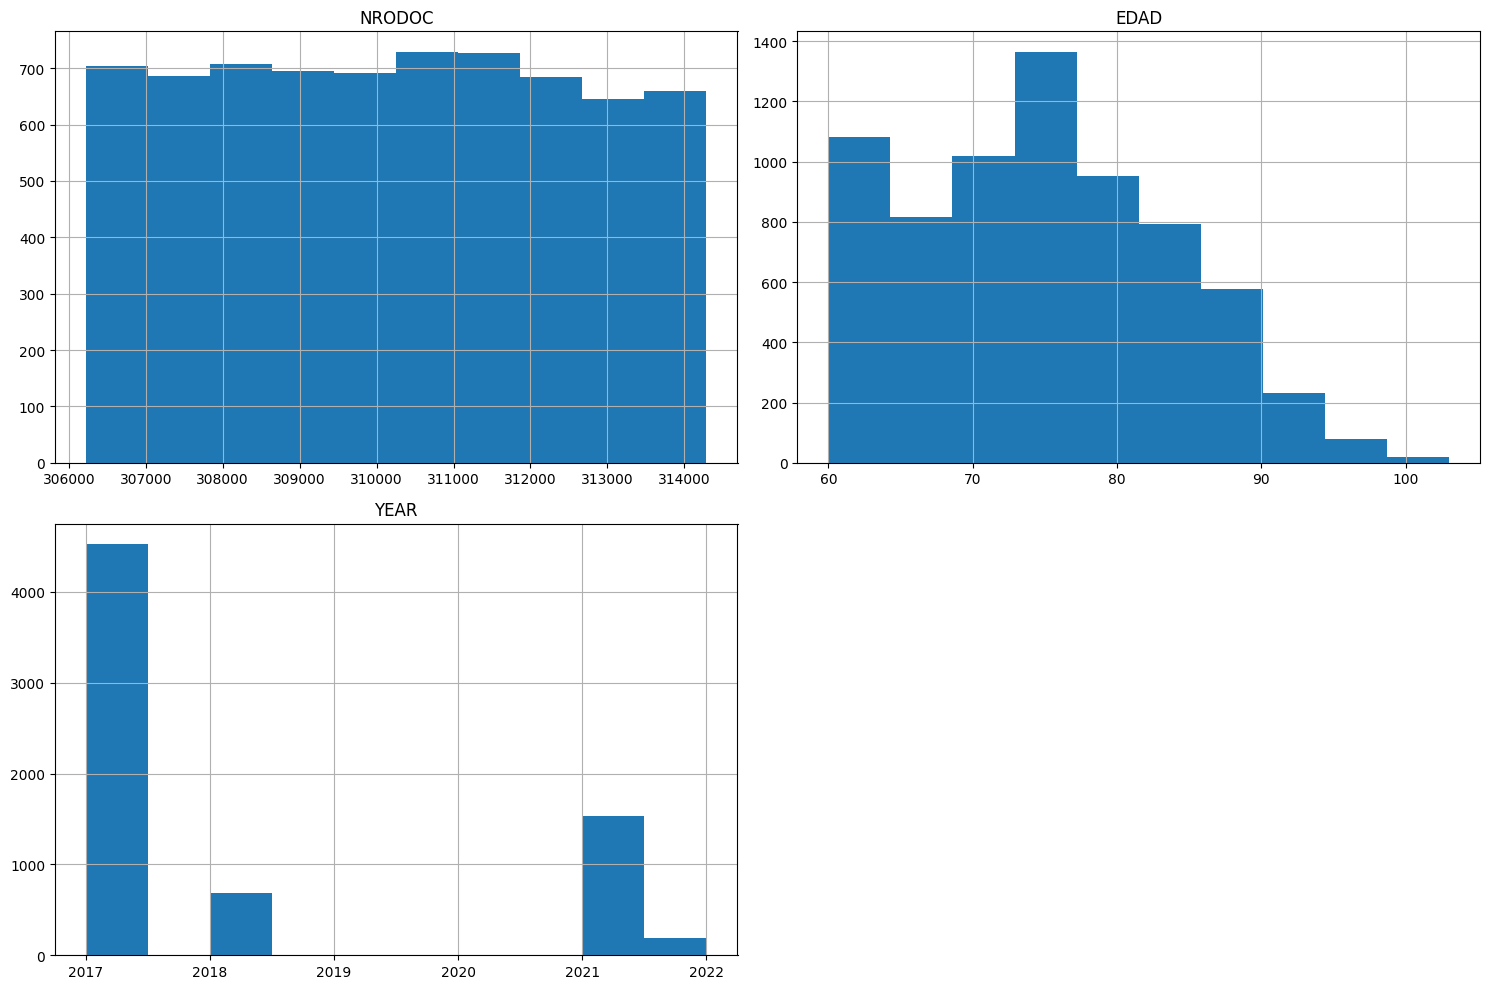

In [38]:
# Distribución de variables numéricas
df_usuarios60.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [39]:
#Distribución de Variables Categóricas
for column in df_usuarios60.select_dtypes(include=['object']).columns:
    print(df_usuarios60[column].value_counts())

SEXO
F    4422
M    2508
Name: count, dtype: int64
MES
SEPTIEMBRE    4298
ENERO         1266
OCTUBRE        354
DICIEMBRE      354
JUNIO          179
AGOSTO         152
MARZO          112
FEBRERO         90
NOVIEMBRE       53
MAYO            35
JULIO           24
ABRIL           13
Name: count, dtype: int64
QUINQUENIO
70-74     1343
75-79     1284
80-84     1096
60-64     1083
65-69     1049
85-89      668
>90        407
Name: count, dtype: int64


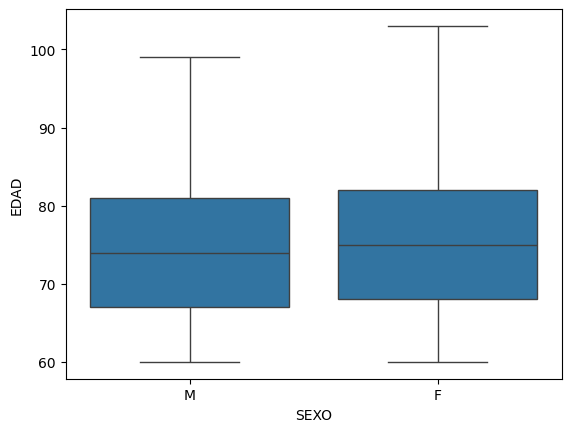

In [40]:
#Comparación entre grupos
sns.boxplot(x='SEXO', y='EDAD', data=df_usuarios60)
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


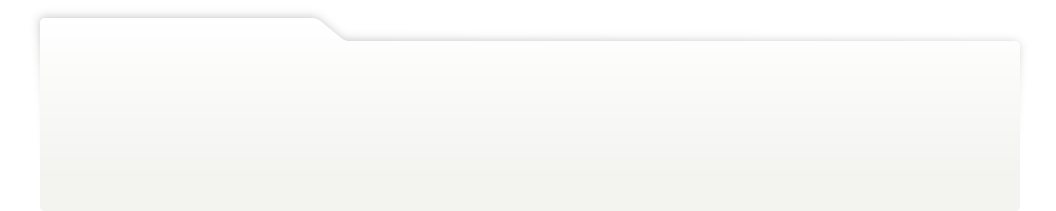
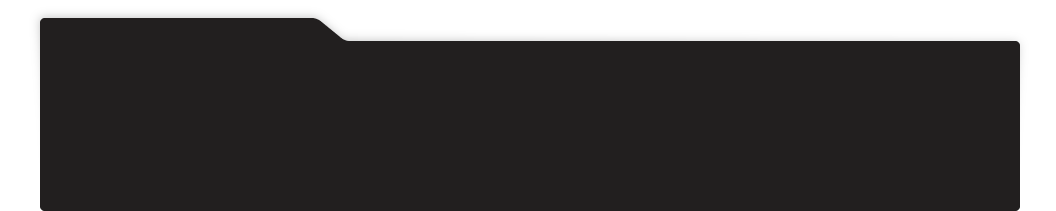
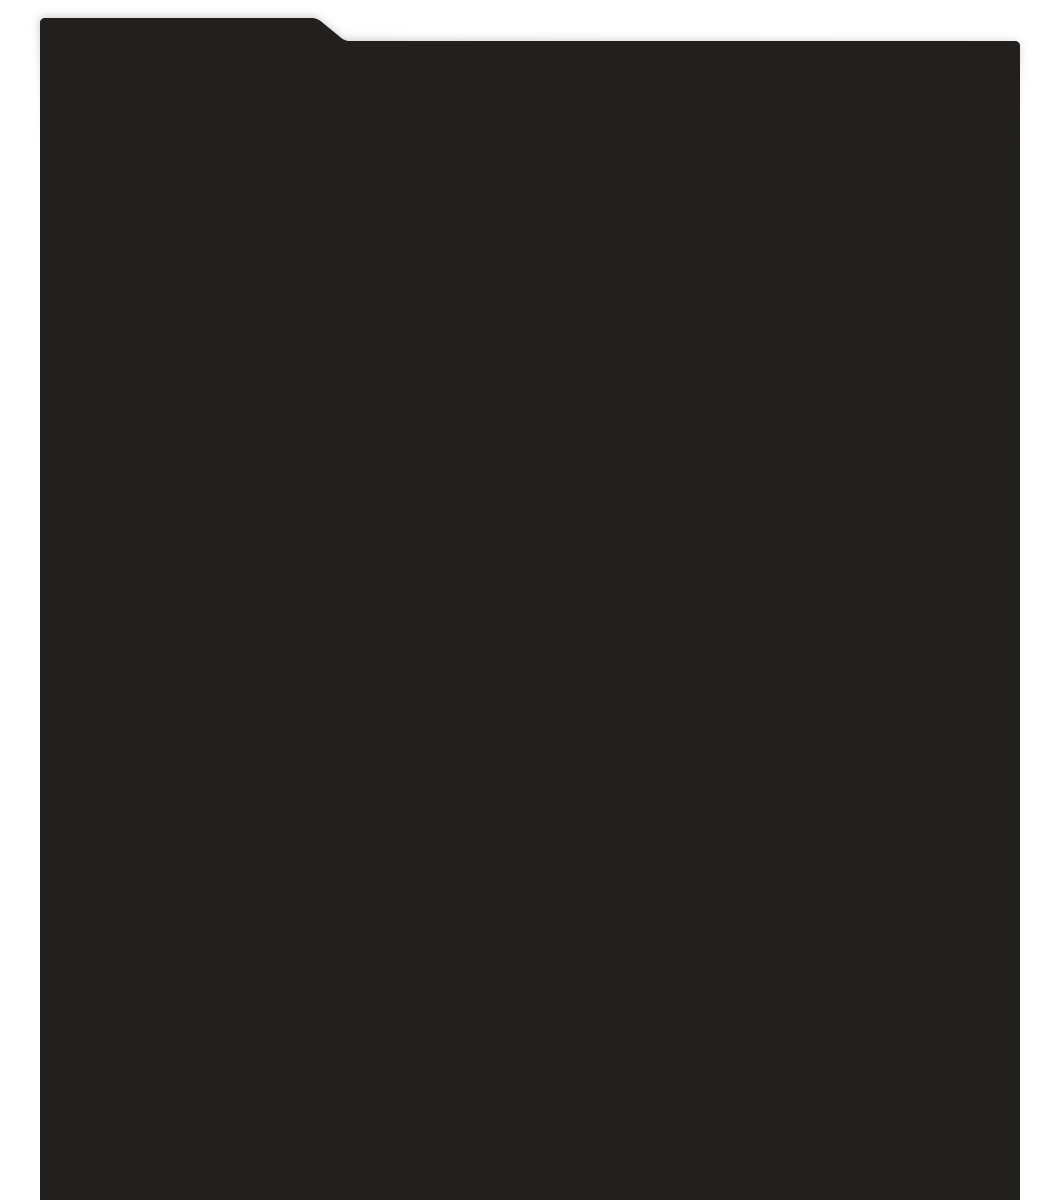
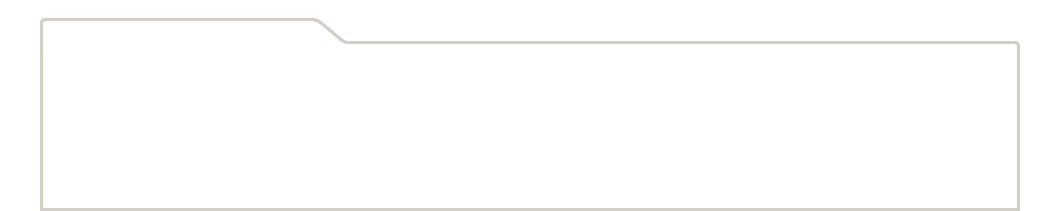
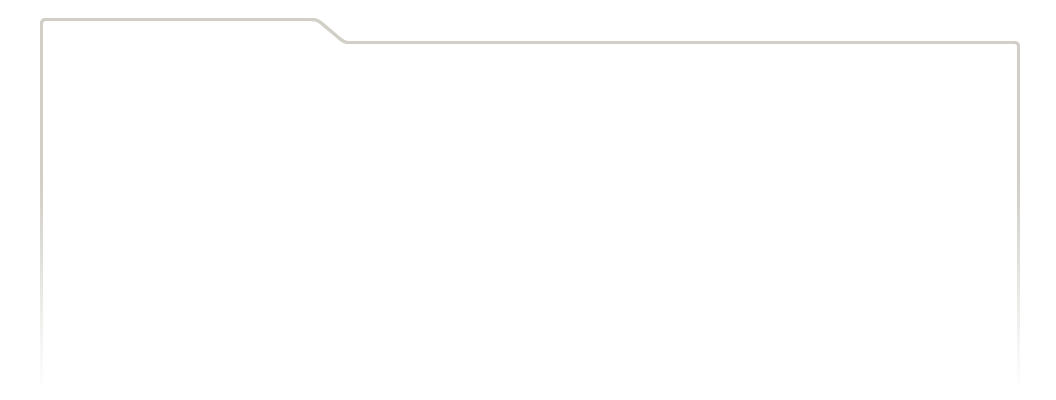
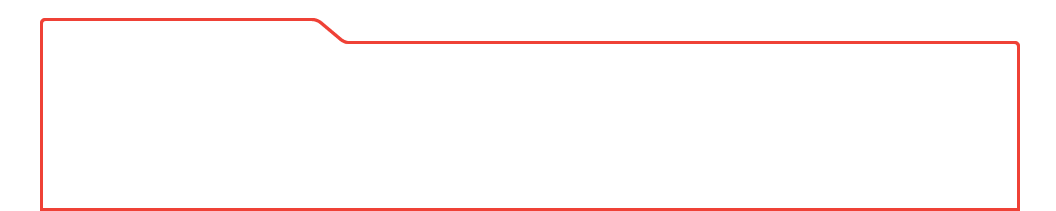
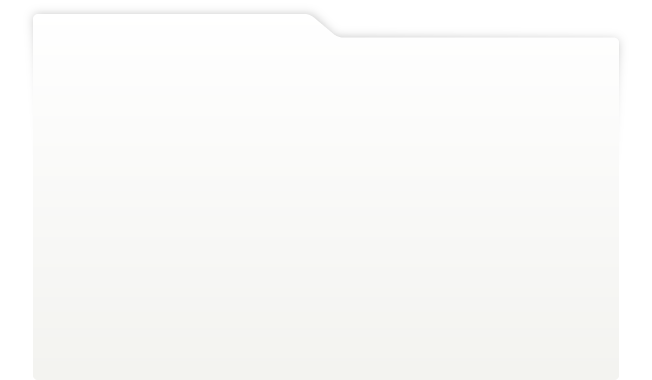
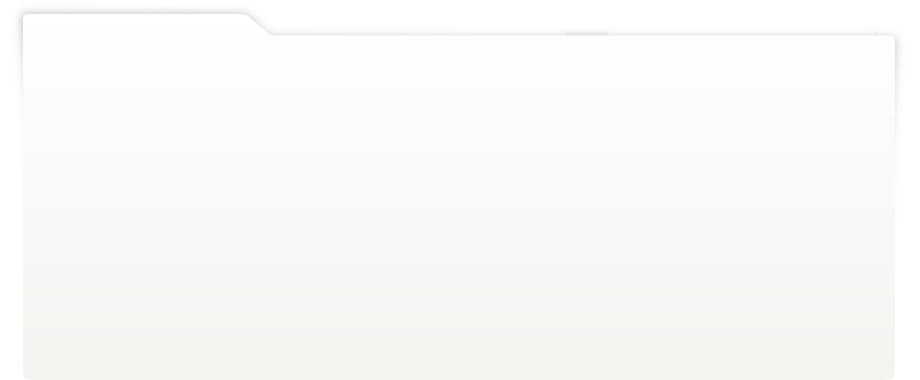
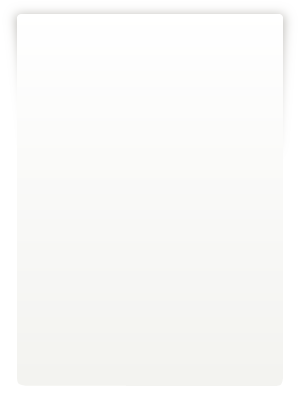
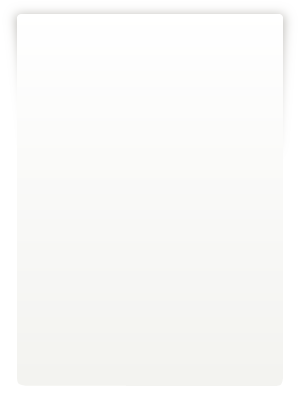
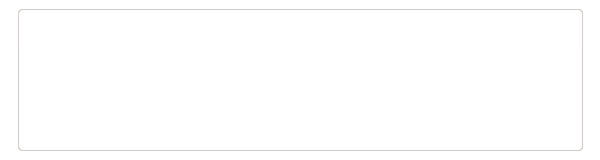
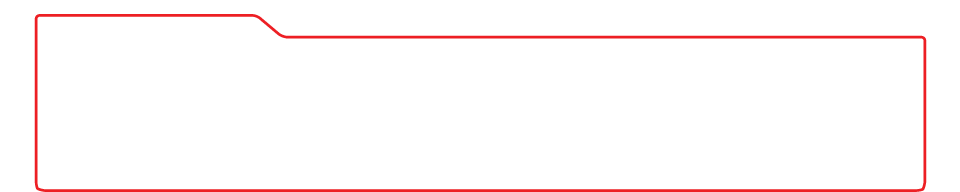
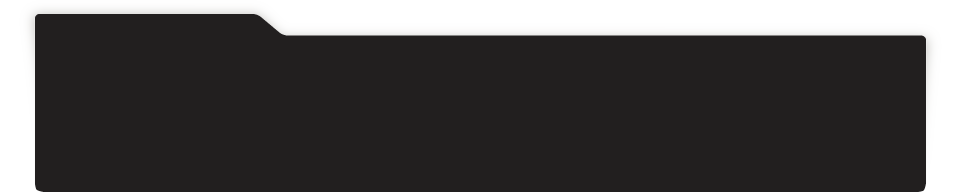
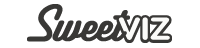
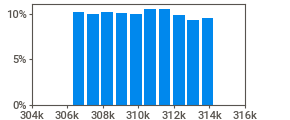
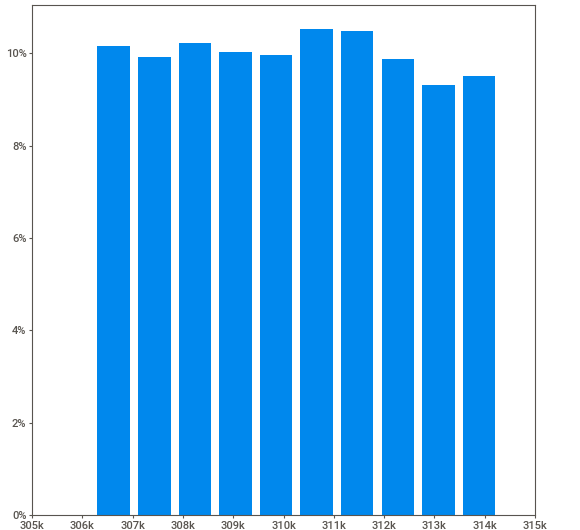
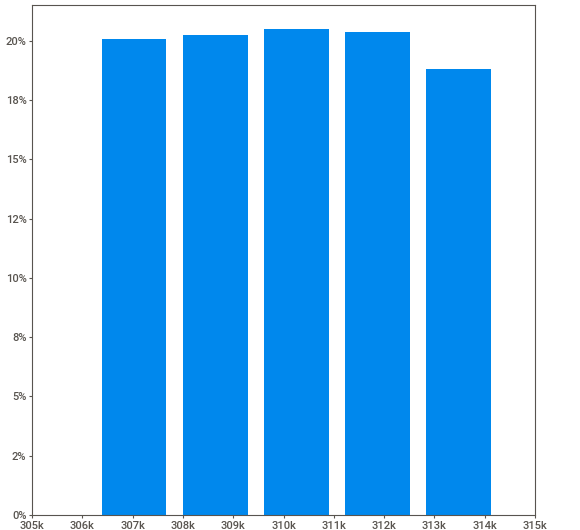
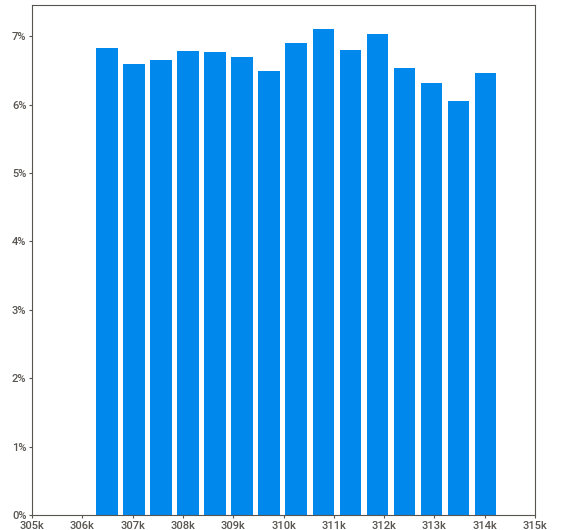
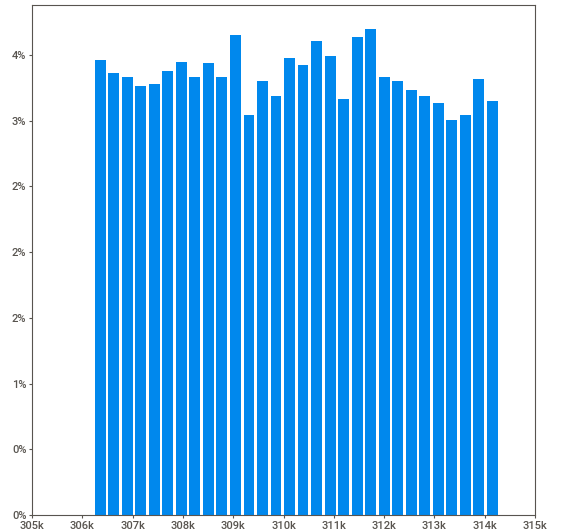
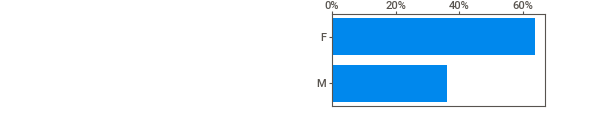
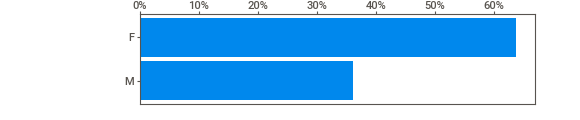
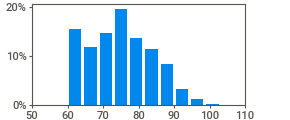
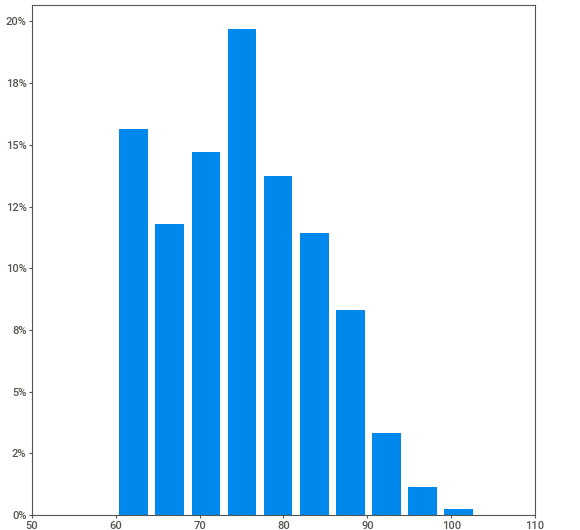
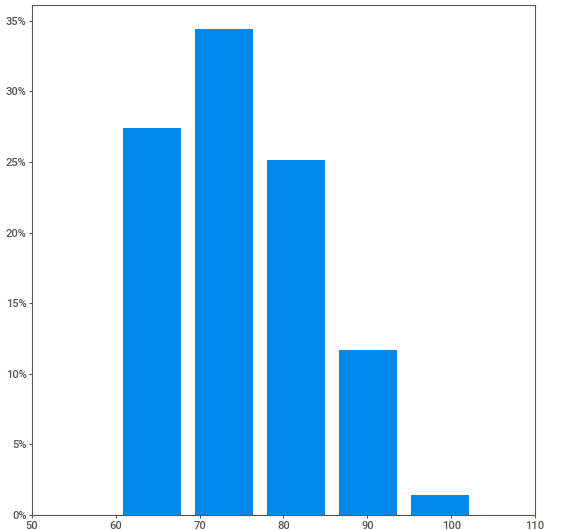
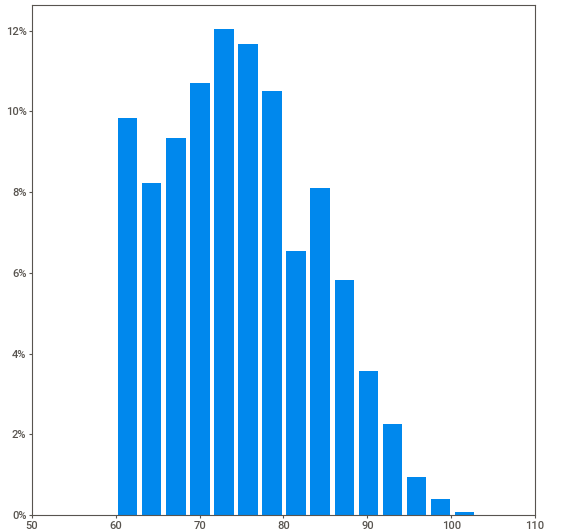
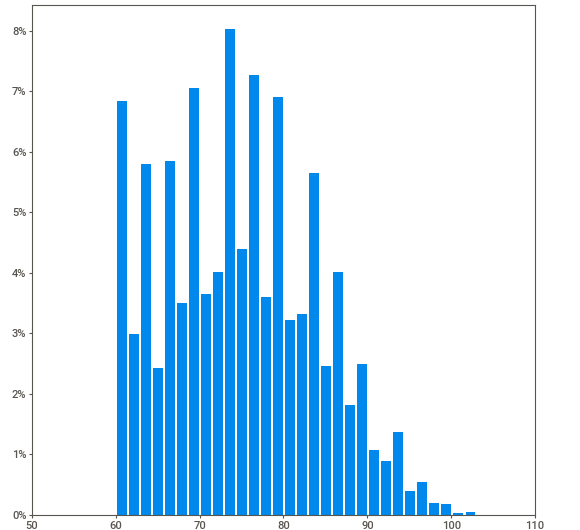
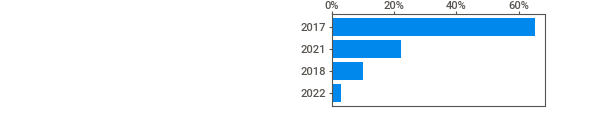
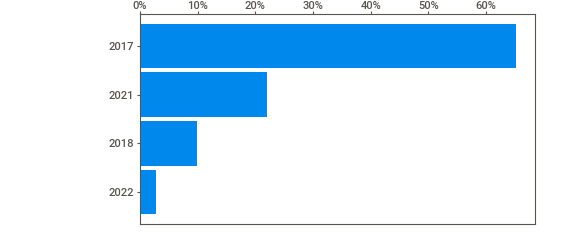
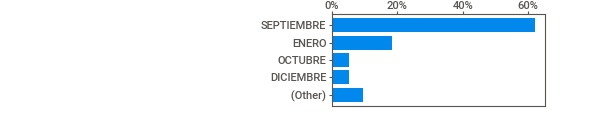
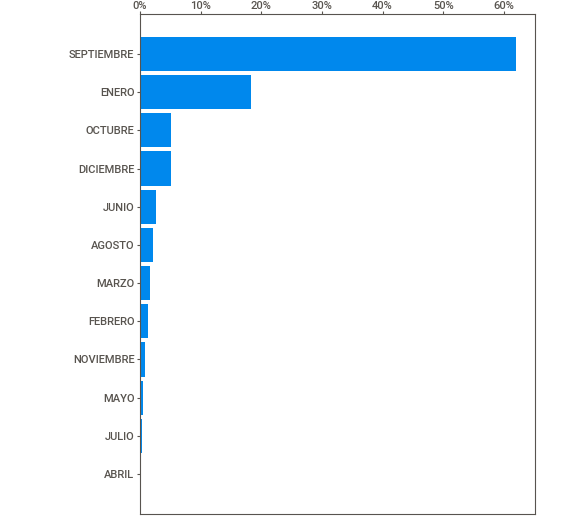
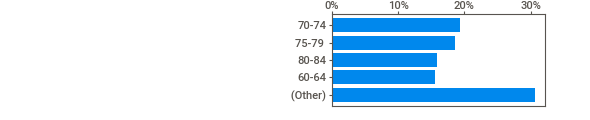
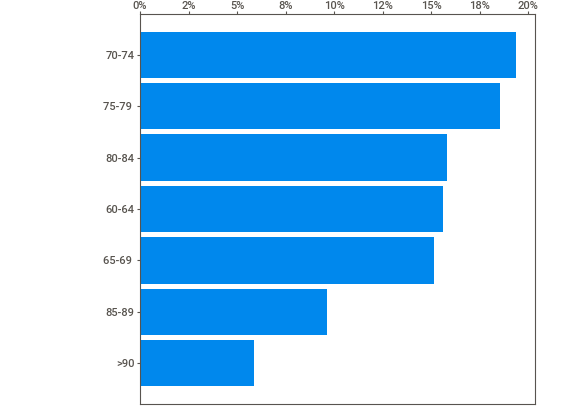
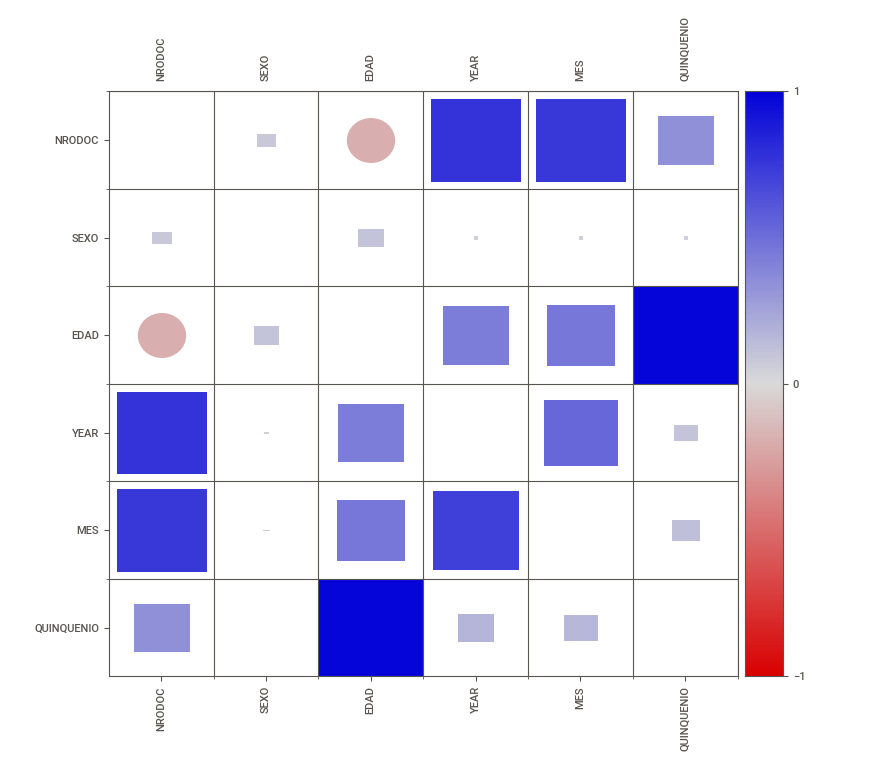
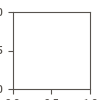

In [41]:
#Ahora haremos una exploración rapida de las variables del df df_usuarios60
rgd = sv.analyze(df_usuarios60)
rgd.show_notebook()

De esta exploración inicial, en la base de usuarios, puede decirse que el 64% son usuarios de sexo femenino y 36% masculino.
En cuanto a la edad, se tiene el primer filtro que sea igual o mayor que 60 años, la mayor parte se concentra en los 75 años y se tiene una edad máxima de 103 años.
Se tiene información de usuarios que ingresaron al programa desde el año 2017 con la mayoría de registros (65%) y hasta 2022 con la menor proporción (3%).
El mes de septiembre es en el que mayores registros se tiene (62%).
Y la clasificación por quiquenio (5 años de edad), se tiene concentrada en las categorías 70-74 y 75-79 con 19% de los datos cada una.



##Base egresos

In [42]:
#Resumen Estadístico: Descripción básica de las variables numéricas
print(df_egresos60.describe())

              YEAR         NRODOC          FECHA INGRESO CLINICA  \
count  3736.000000    3736.000000                           3736   
mean   2019.130889  309638.228051  2019-08-21 21:17:45.470360832   
min    2017.000000  306223.000000     2017-12-19 10:59:05.197000   
25%    2018.000000  307845.000000  2018-06-05 12:58:22.036750080   
50%    2018.000000  309697.000000     2018-10-19 18:07:35.648000   
75%    2021.000000  311371.500000  2021-05-05 07:15:49.310749952   
max    2021.000000  314023.000000     2021-12-31 17:27:17.290000   
std       1.474549    2012.537730                            NaN   

              FECHA INGRESO SERVICIO                   FECHA SALIDA  \
count                           3736                           3736   
mean   2019-08-24 08:43:30.051013120  2019-08-29 11:23:10.742505216   
min       2017-12-19 17:40:00.860000            2017-12-21 14:08:28   
25%    2018-06-07 11:40:40.105750016            2018-06-13 06:26:45   
50%    2018-10-21 17:06:42.21150

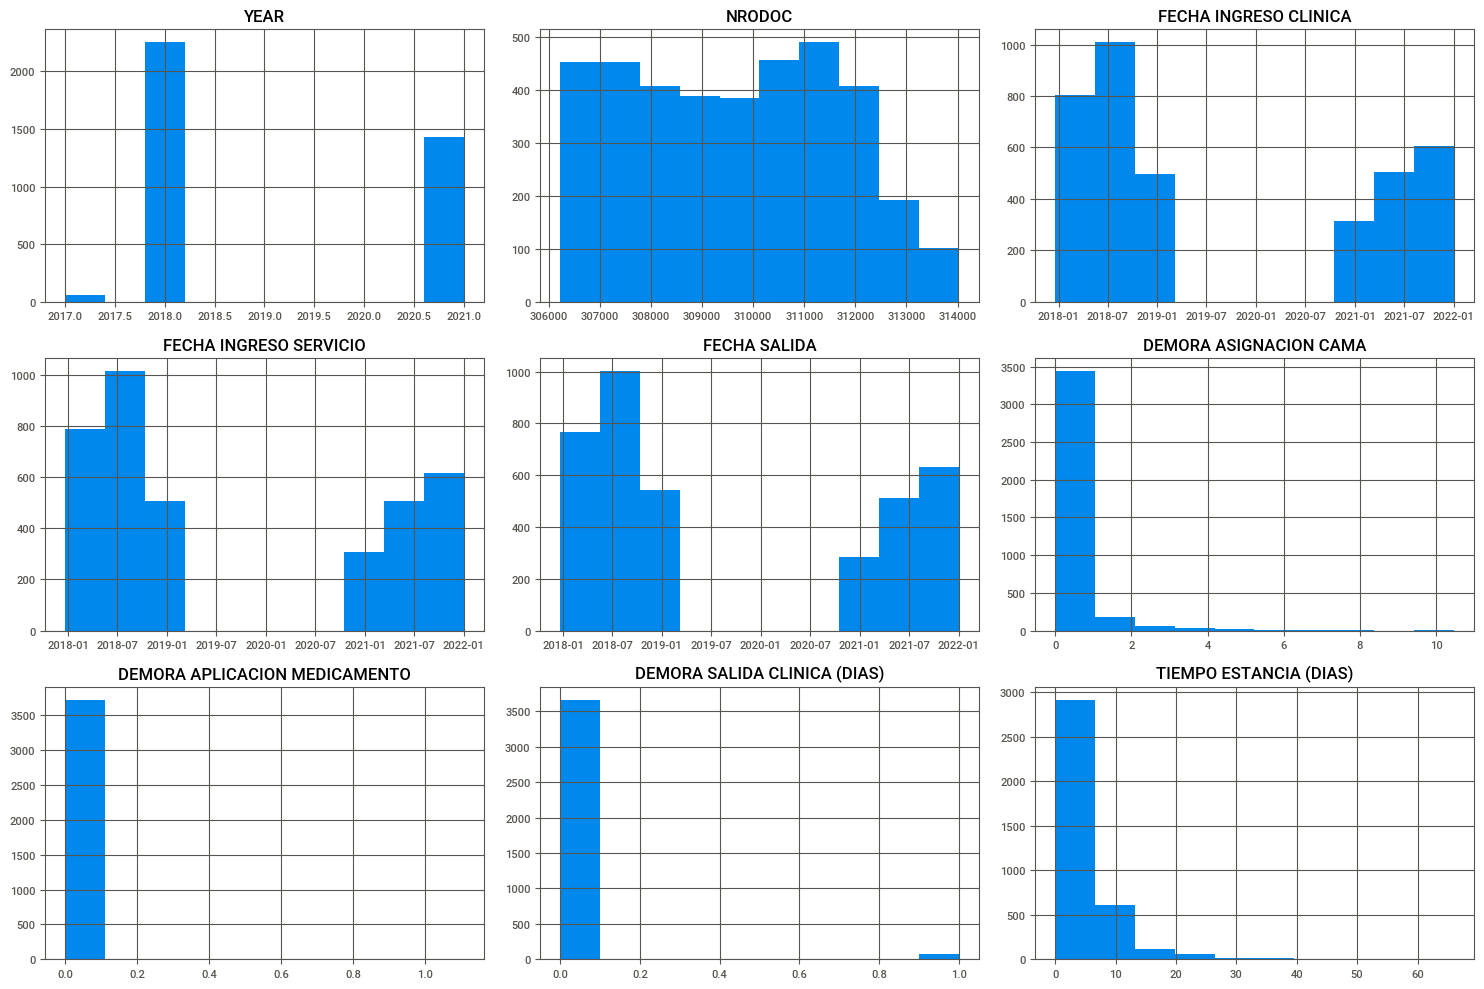

In [43]:
# Distribución de variables numéricas
df_egresos60.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [44]:
#Distribución de Variables Categóricas
for column in df_egresos60.select_dtypes(include=['object']).columns:
    print(df_egresos60[column].value_counts())

MES
DICIEMBRE     418
MARZO         362
OCTUBRE       353
AGOSTO        344
SEPTIEMBRE    337
JUNIO         316
JULIO         314
ENERO         312
FEBRERO       303
NOVIEMBRE     296
MAYO          295
ABRIL          86
Name: count, dtype: int64
REGIMEN AFILIACION
Contributivo          3731
Subsidiado               2
Particular               1
Soat                     1
Medicina prepagada       1
Name: count, dtype: int64
EPS VALIDADA
NUEVA EPS S.A. PGP           3637
NUEVA EPS S.A.                 96
NO AFILIADO PARTICULAR          1
AXA SEGUROS COLPATRIA S.A       1
ALLIANZ SEGUROS DE VIDA         1
Name: count, dtype: int64
MODALIDAD CONTRATO
PGP       3637
Evento      99
Name: count, dtype: int64
VIA INGRESO
Urgencias                        2597
Remitido                          955
Consulta Externa ó Programada     184
Name: count, dtype: int64
SERVICIO EGRESO
Piso 5 Medicina Interna Sur          541
Piso 7 Medicina Interna Norte        463
Piso 7 Medicina Interna Sur          437

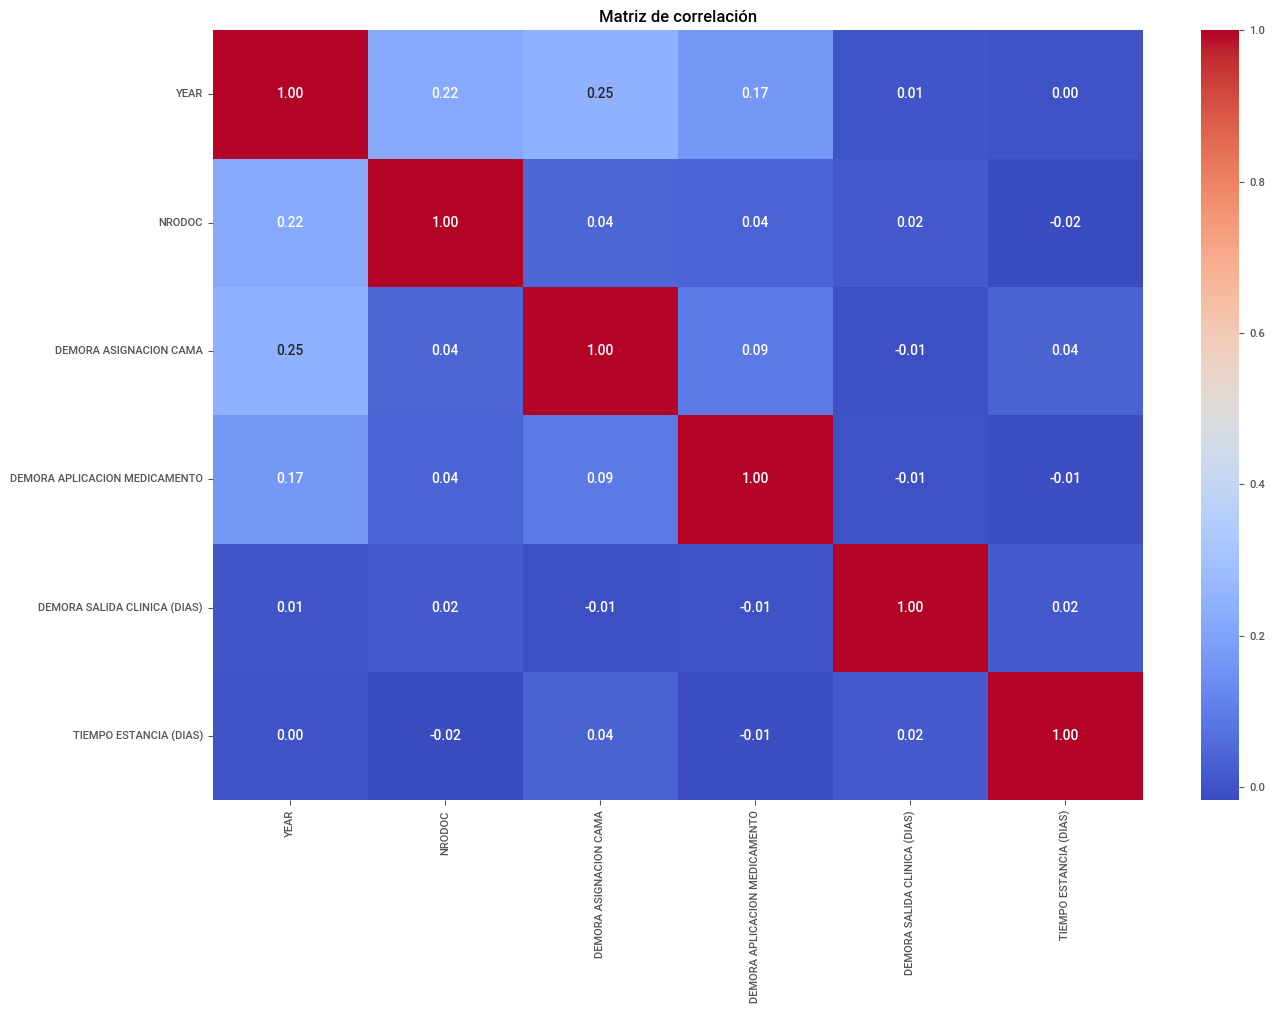

In [45]:
#Correlación entre Variables: Matriz de correlación para variables numéricas.
# Seleccionar solo las columnas numéricas
numeric_cols = df_egresos60.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
corr_matrix = df_egresos60[numeric_cols].corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

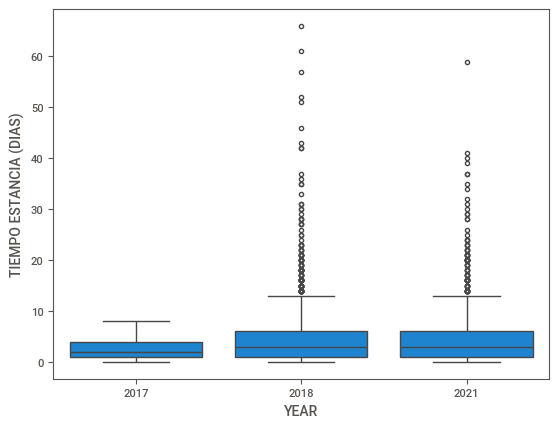

In [46]:
#Comparación entre Grupos
sns.boxplot(x='YEAR', y='TIEMPO ESTANCIA (DIAS)', data=df_egresos60)
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


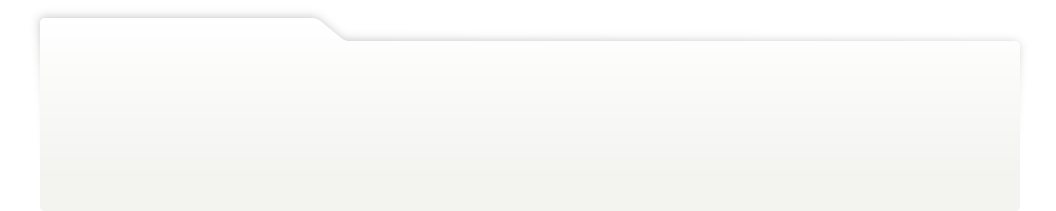
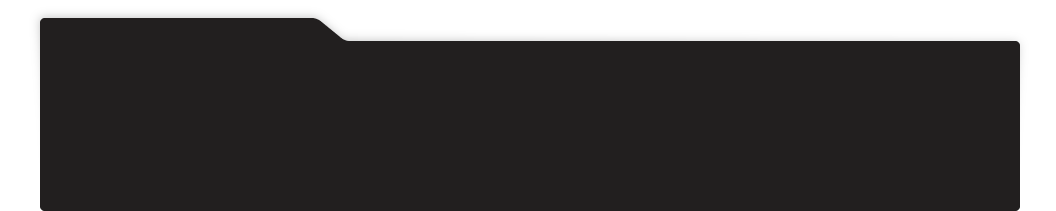
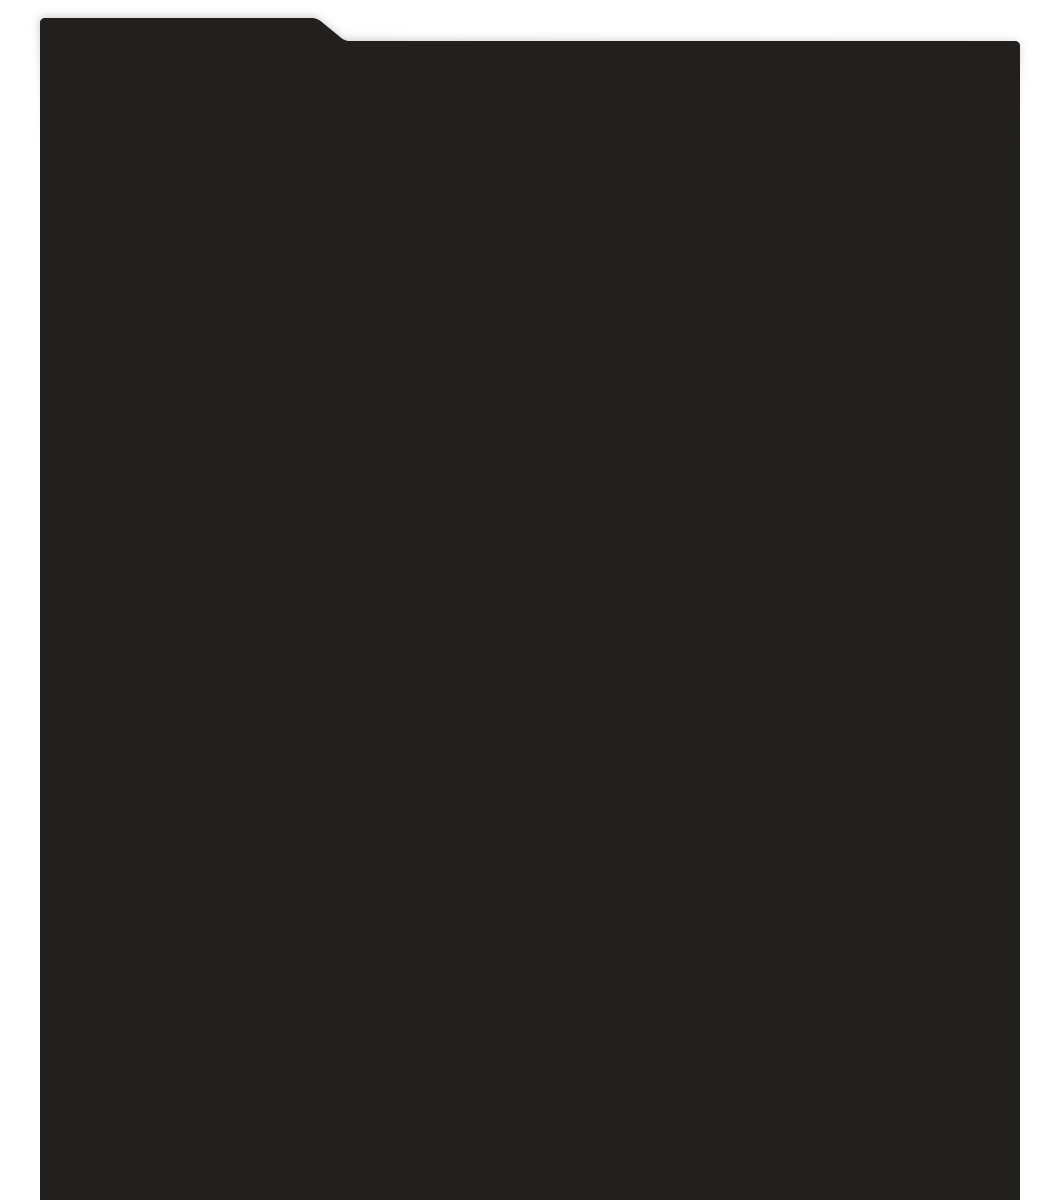
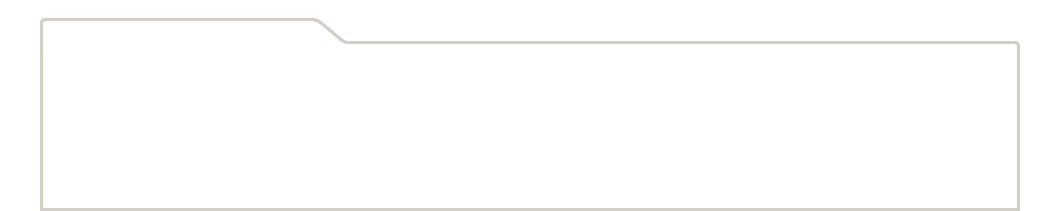
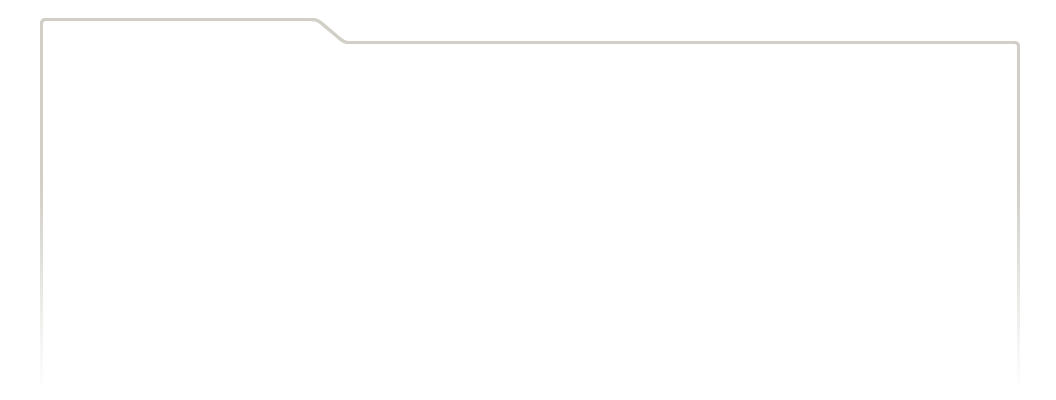
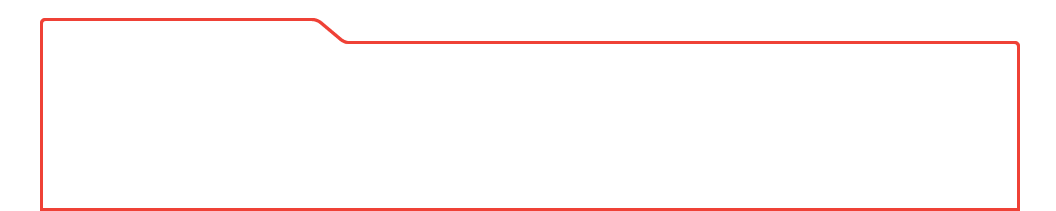
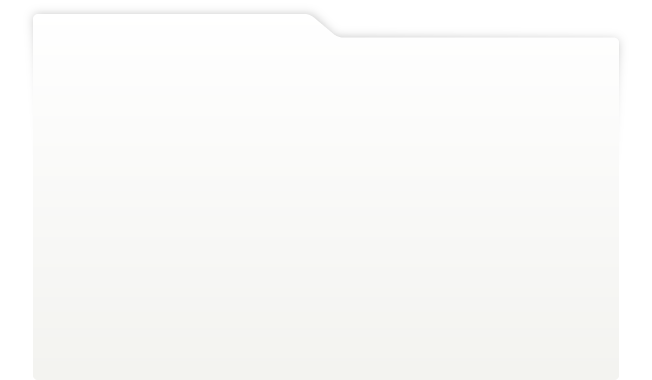
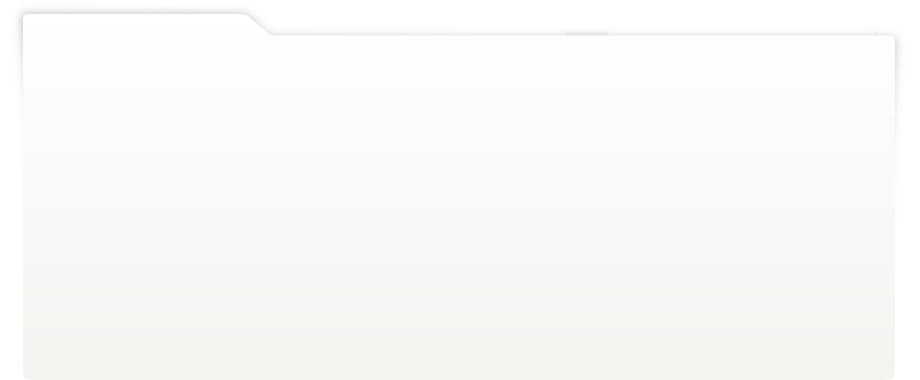
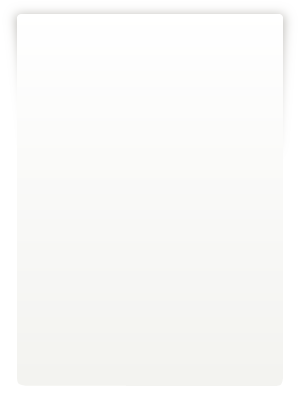
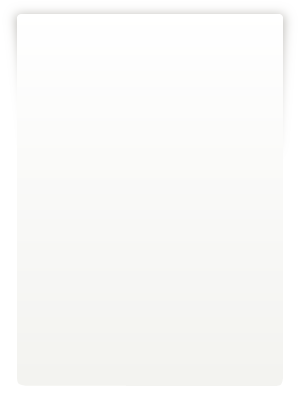
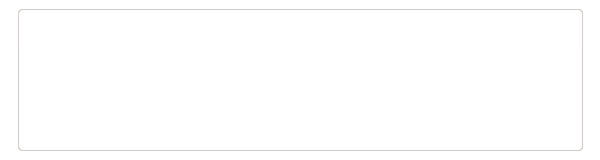
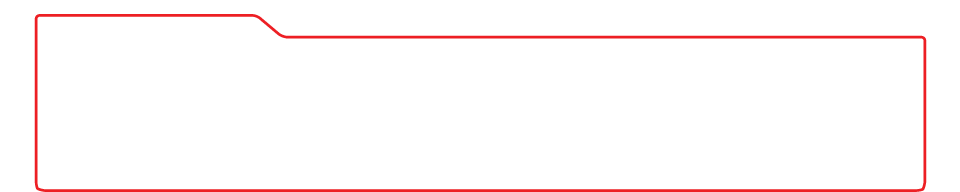
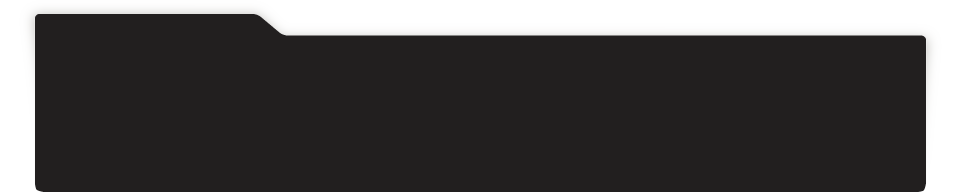
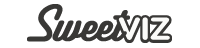
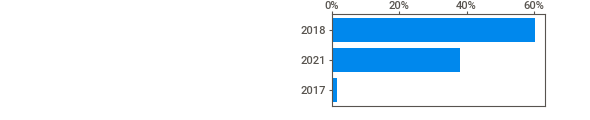
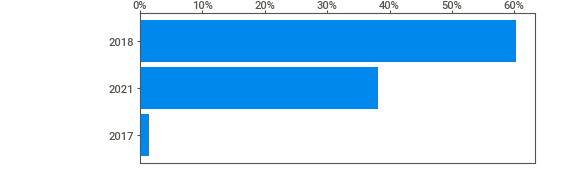
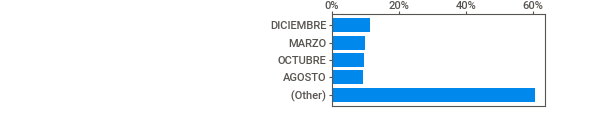
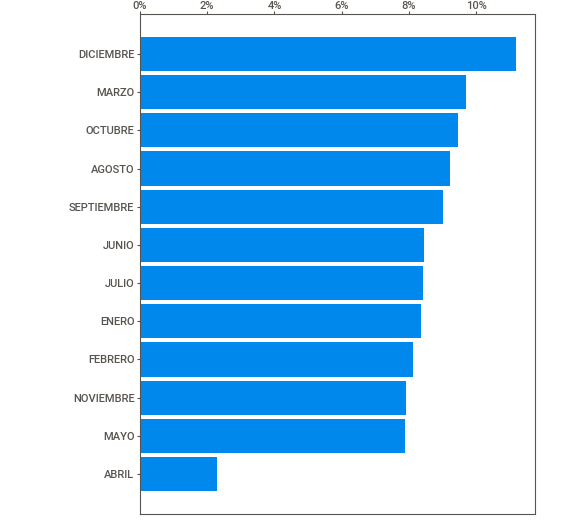
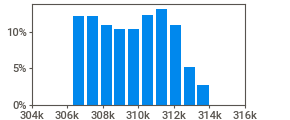
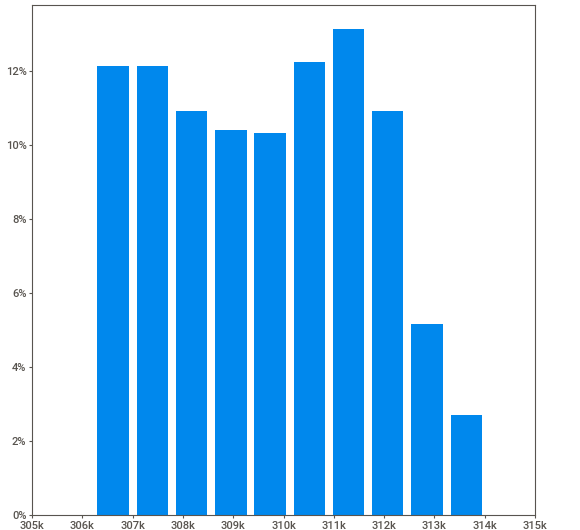
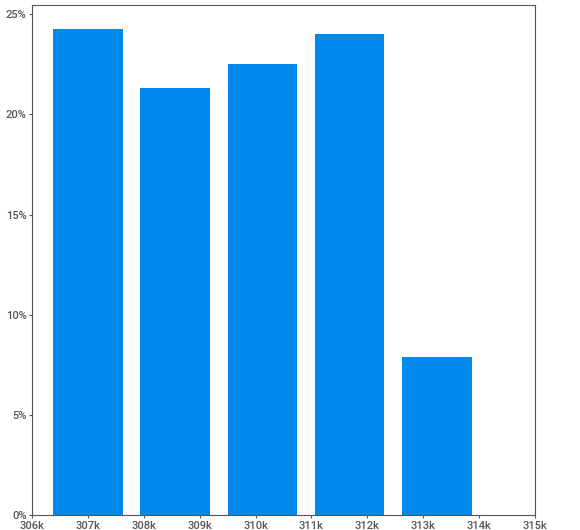
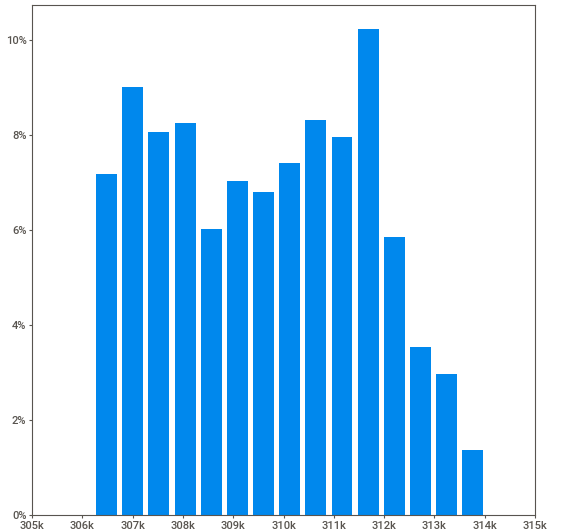
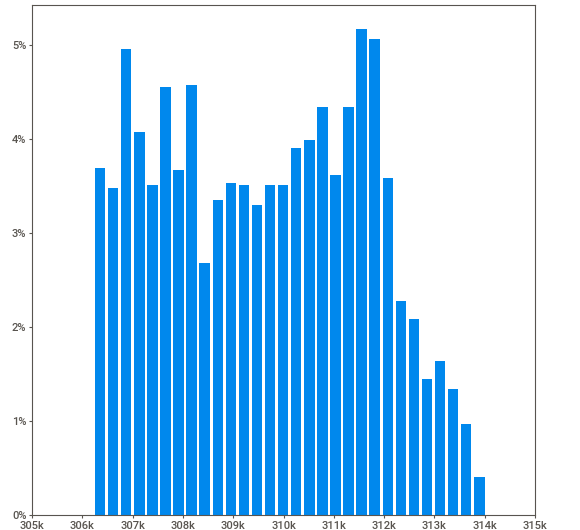
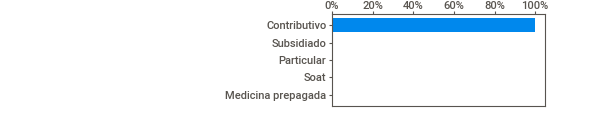
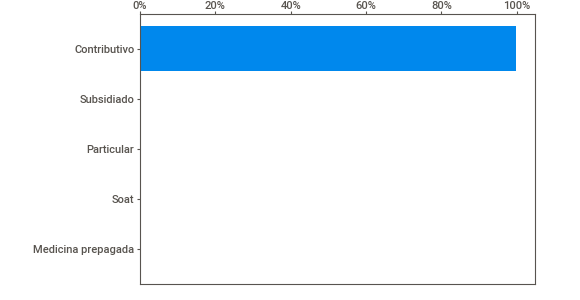
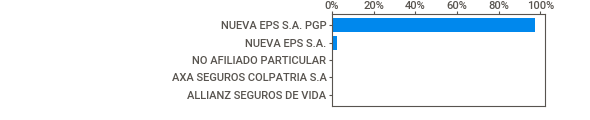
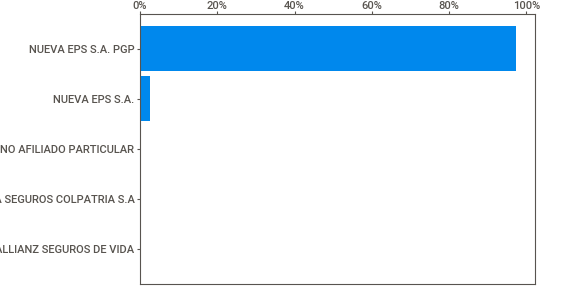
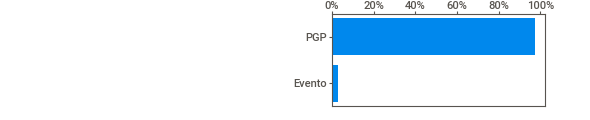
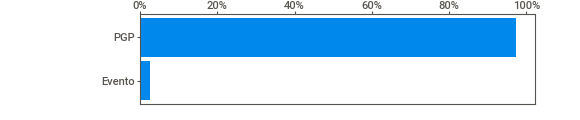
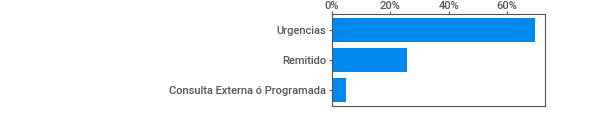
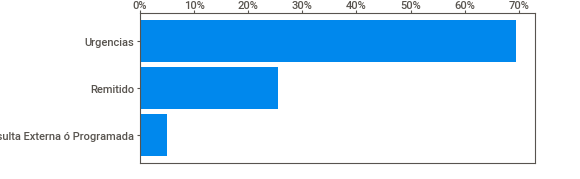
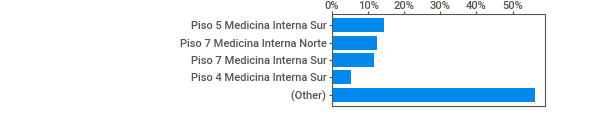
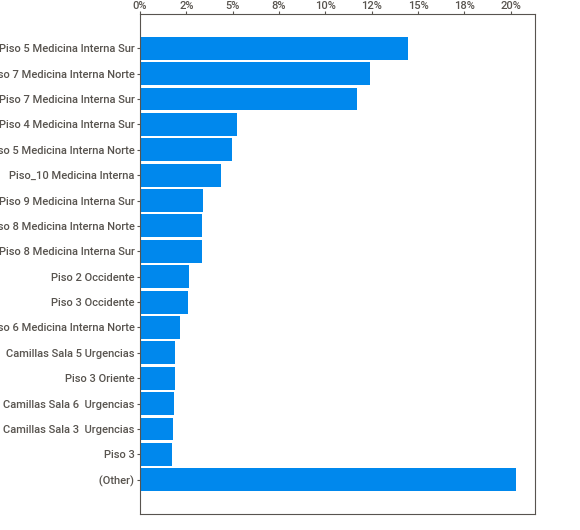
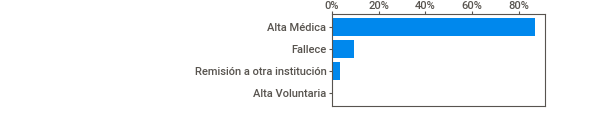
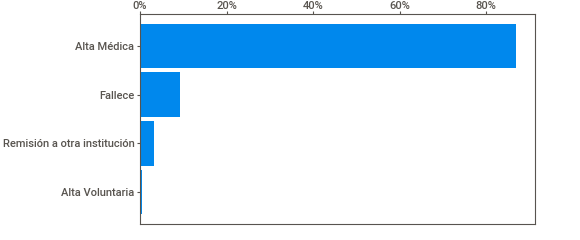
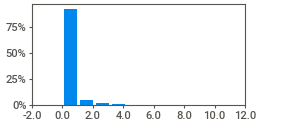
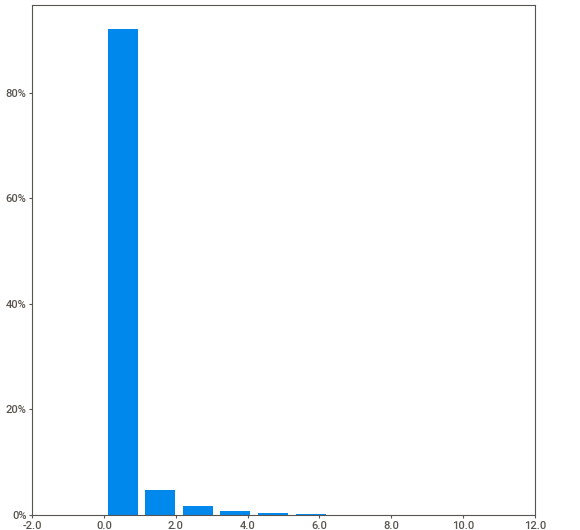
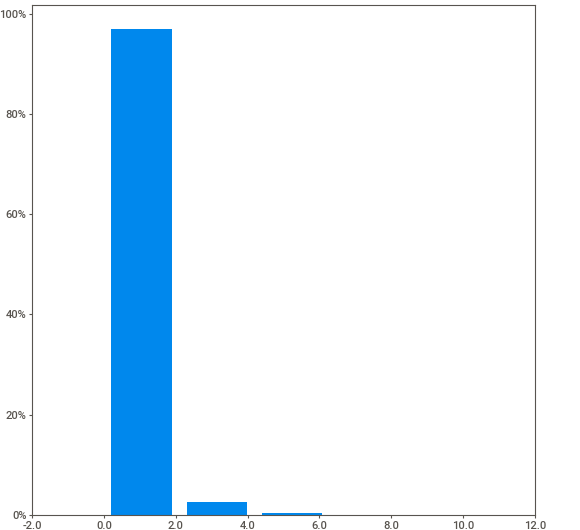
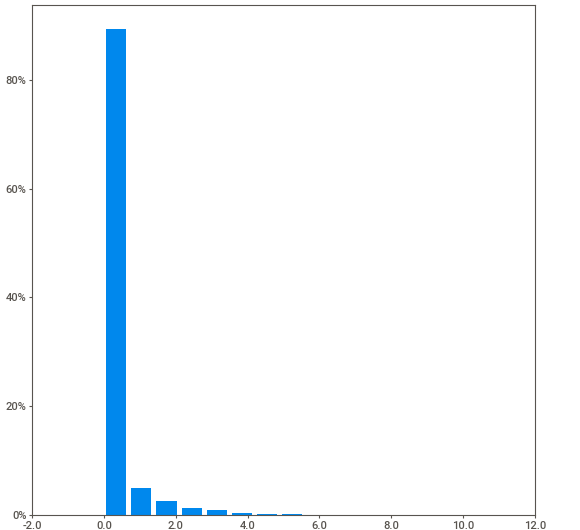
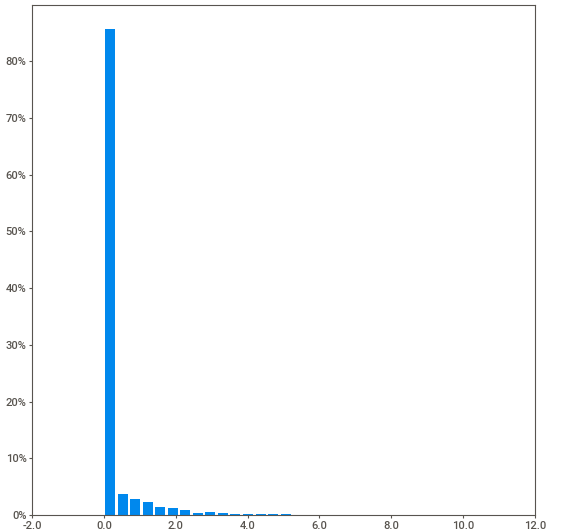
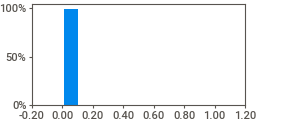
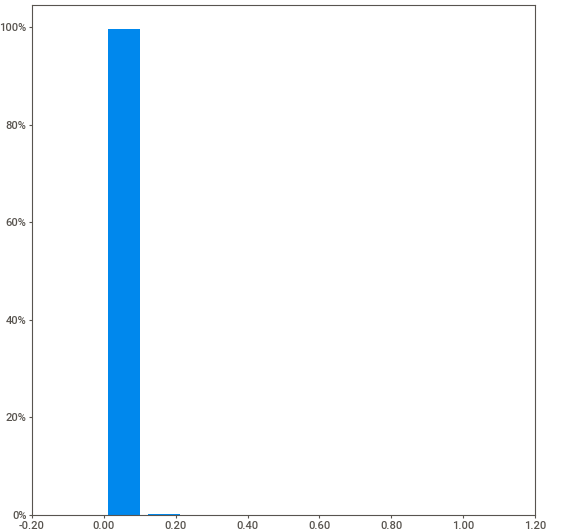
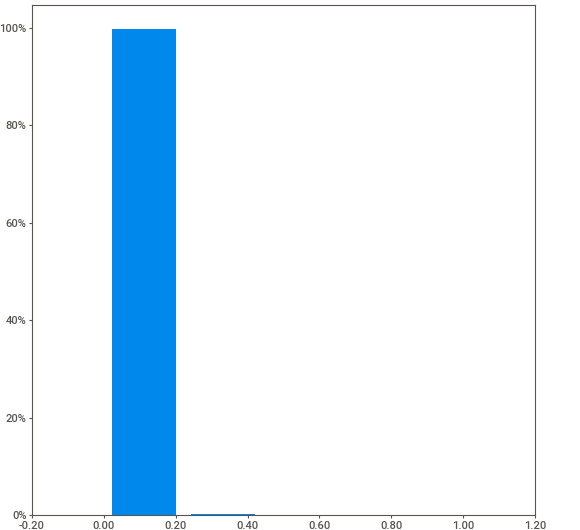
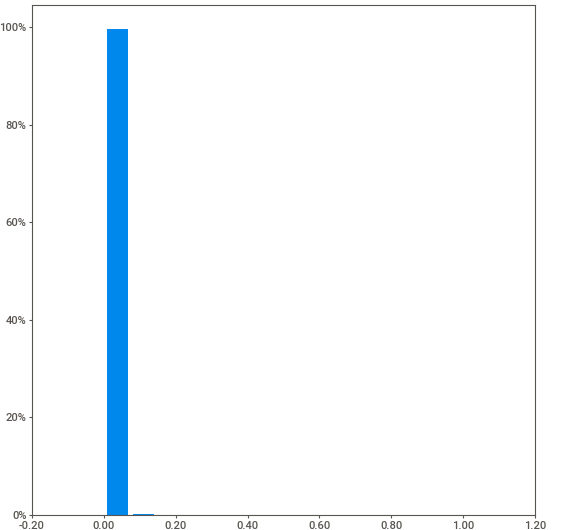
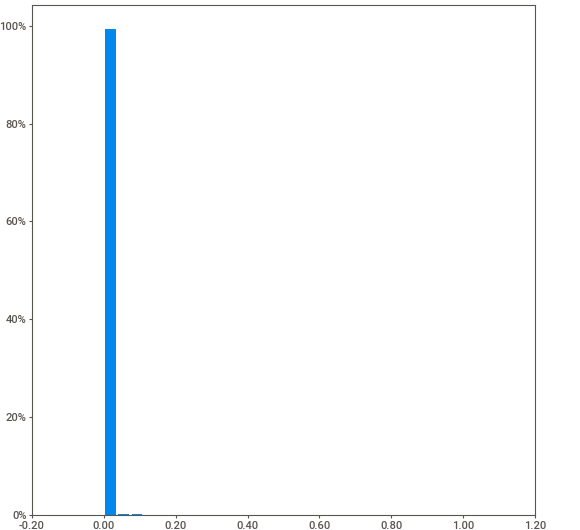
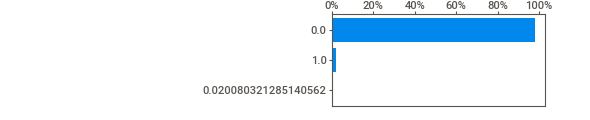
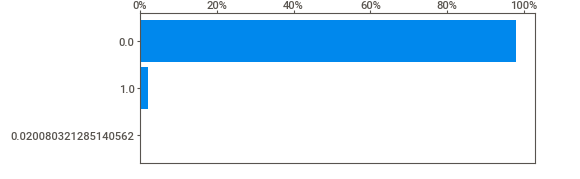
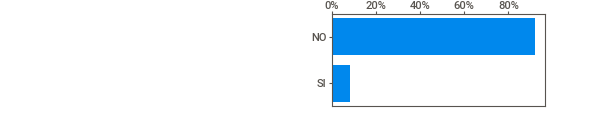
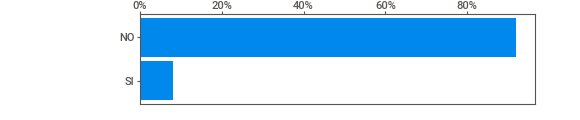
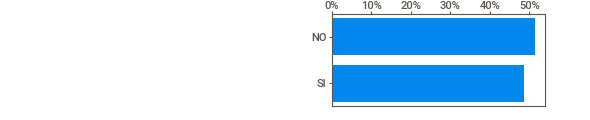
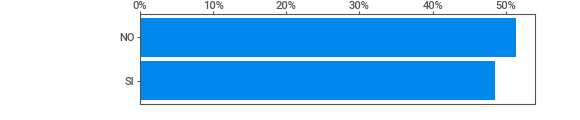
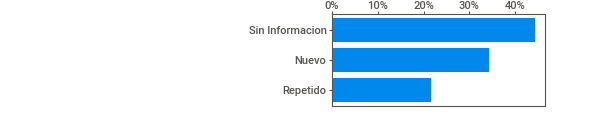
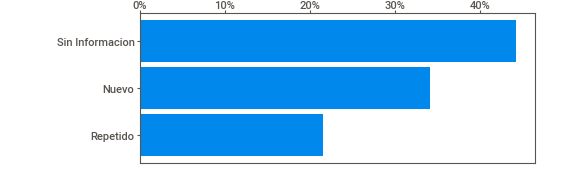
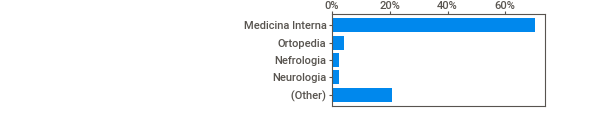
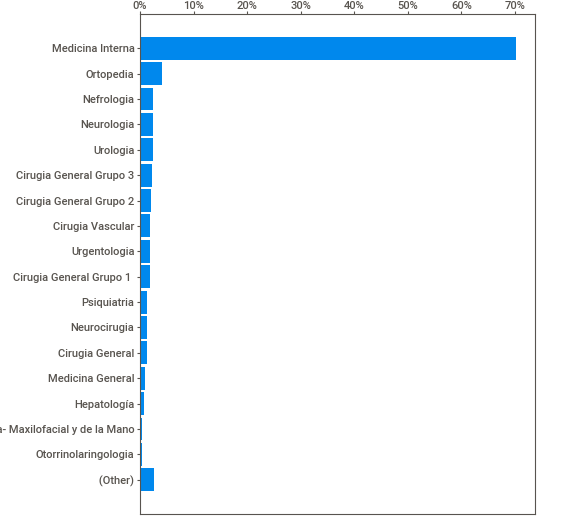
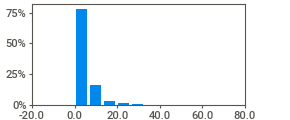
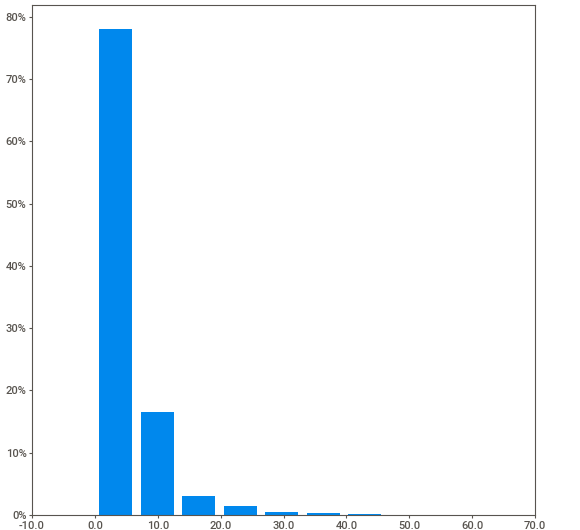
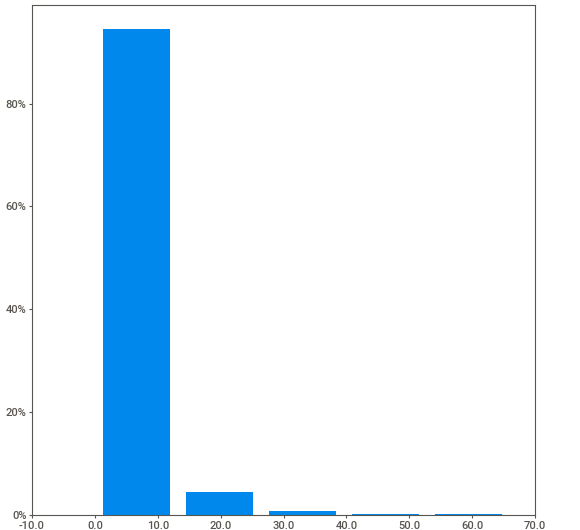
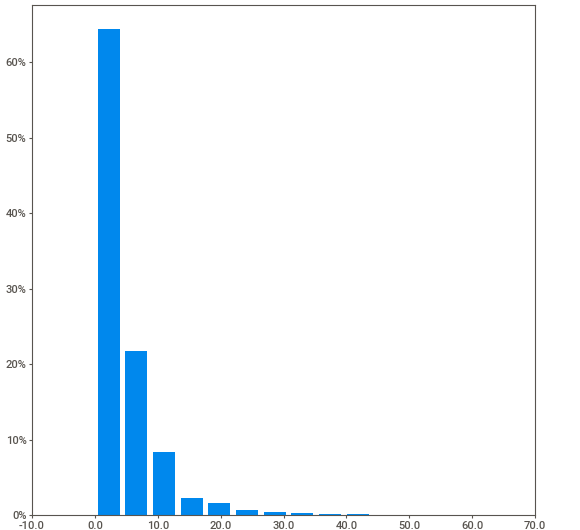
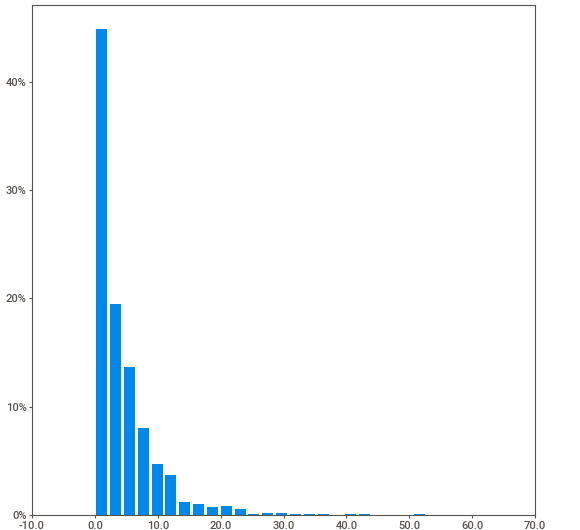
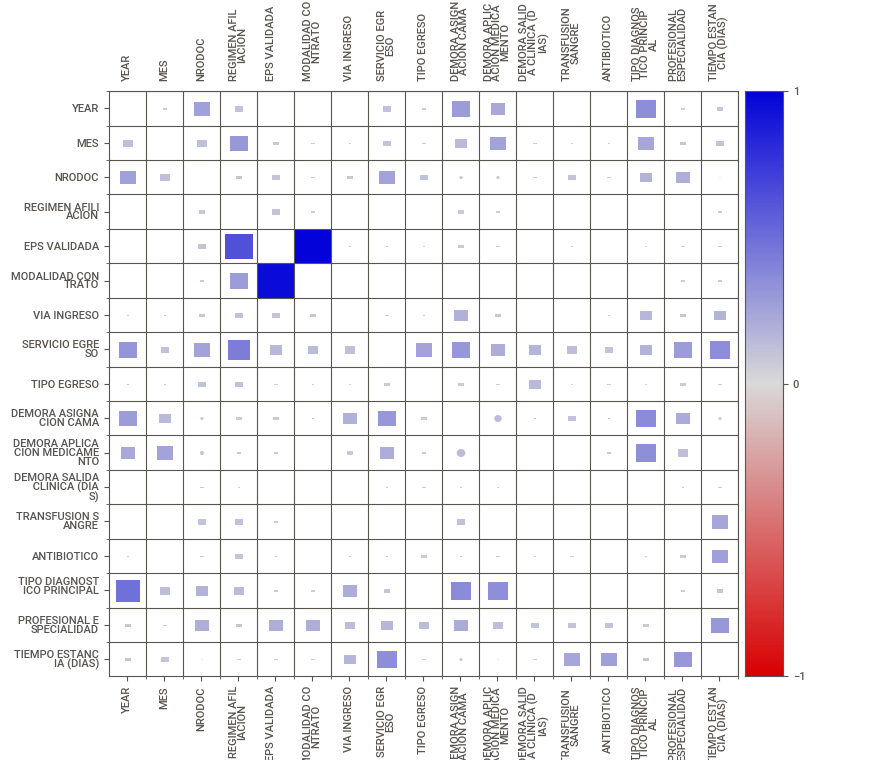
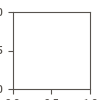

In [47]:
#ahora haremos una exploración rápida de las variables del df_egresos60
rgd = sv.analyze(df_egresos60)
rgd.show_notebook()

La mayoría de los datos en esta base de egresos, corresponden al año 2018 (60%), se tiene también de los años 2017 y 2021.
En el mes de diciembre es en el cual se da mayor cantidad de registros de ingresos (11%)
El régimen de afiliación es principalmente Contibutivo con más del 99% de los datos.
La EPD a la que pertenecen los usuarios es en un 97% a la NUEVA EPS S.A. PGP y casi 3% a la NUEVA EPS S.A.
La modalidad del contrato en su mayoría es PGP en un 97% y por evento en un 3%.
La vía de ingreso a la clínica es 70% por Urgencias, 25% por remisión ysolo 5% por consulta externa o programada.
En cuanto al servicio de egreso, principalmente se da en el piso 5 que corresponde a Medicina Interna Sur con un 14%, aunque se tiene un 20% clasificado como otro.
El 87% de los tipos de egreso, se dan por Alta médica, 9% fallecen, 3% es por remisión a otra institución y menos del 1% se da por alta voluntaria.
El 75% de los casos, recibe inmediata asignación de cama unos instantes después de su ingreso a la clínica, sin embargo, hay casos de hasta 10,5 días de espera para asignación de cama (menos del 1%)
En cuanto a la demora de aplicación de medicamento, se tienen tiempos bajos, inferiores a 1 día, en un 45%, el máximo es de 1,11 días.
En cuanto a la demora de salida de la clínica que mide el tiempo entre el alta médica y la salida efectiva, se tiene que el 98% es menor a 1 día y un 2% es igual a 1 día.
El 92% de los usuarios no requieren transfusión de sangre.
El 51% de los usuarios no requieren medicamento, el 49% restante sí lo requieren.
En cuanto al tipo de diagnóstico principal, el 34% es un diagnóstico nuevo, 22% es diagnóstico repetido y 44% está sin información.
El 70% de las especialidades médicas es de Medicina interna.
Finalmente, el tiempo de estancia es de 4.6 días en promedio, con un máximo de 66 días y una mediana de 3 días.

In [48]:
#Vamos a tomar solo la información del tipo de diagnóstico principal "NUEVO", para disminuir repeticiones.
df_egresos60 = df_egresos60[df_egresos60['TIPO DIAGNOSTICO PRINCIPAL'] == 'Nuevo']
#Verificamos
print(df_egresos60)

      YEAR        MES  NRODOC REGIMEN AFILIACION        EPS VALIDADA  \
7     2018      MARZO  310222       Contributivo  NUEVA EPS S.A. PGP   
11    2021      JUNIO  307108       Contributivo  NUEVA EPS S.A. PGP   
15    2018      MARZO  308738       Contributivo  NUEVA EPS S.A. PGP   
27    2018    FEBRERO  307058       Contributivo  NUEVA EPS S.A. PGP   
31    2021      MARZO  307411       Contributivo  NUEVA EPS S.A. PGP   
...    ...        ...     ...                ...                 ...   
6371  2021      MARZO  312056       Contributivo  NUEVA EPS S.A. PGP   
6372  2018    FEBRERO  308757       Contributivo  NUEVA EPS S.A. PGP   
6373  2018      MARZO  308759       Contributivo  NUEVA EPS S.A. PGP   
6374  2021  NOVIEMBRE  313987       Contributivo  NUEVA EPS S.A. PGP   
6375  2021    OCTUBRE  313921       Contributivo  NUEVA EPS S.A. PGP   

     MODALIDAD CONTRATO VIA INGRESO                SERVICIO EGRESO  \
7                   PGP   Urgencias  Piso 6 Medicina Interna Nort

##Base crónicos

In [49]:
# Resumen Estadístico:Descripción básica de las variables numéricas
print(df_cronicos60.describe())

              YEAR         NRODOC         PESO        TALLA
count  2587.000000    2587.000000  2587.000000  2587.000000
mean   2018.993815  309714.340162    68.177331   155.758343
std       1.815749    2055.833556    14.975362    14.294552
min    2017.000000  306223.000000     1.000000     1.000000
25%    2017.000000  307874.000000    58.000000   150.000000
50%    2018.000000  309786.000000    68.000000   156.000000
75%    2021.000000  311446.000000    77.000000   163.000000
max    2022.000000  313987.000000   171.000000   190.000000


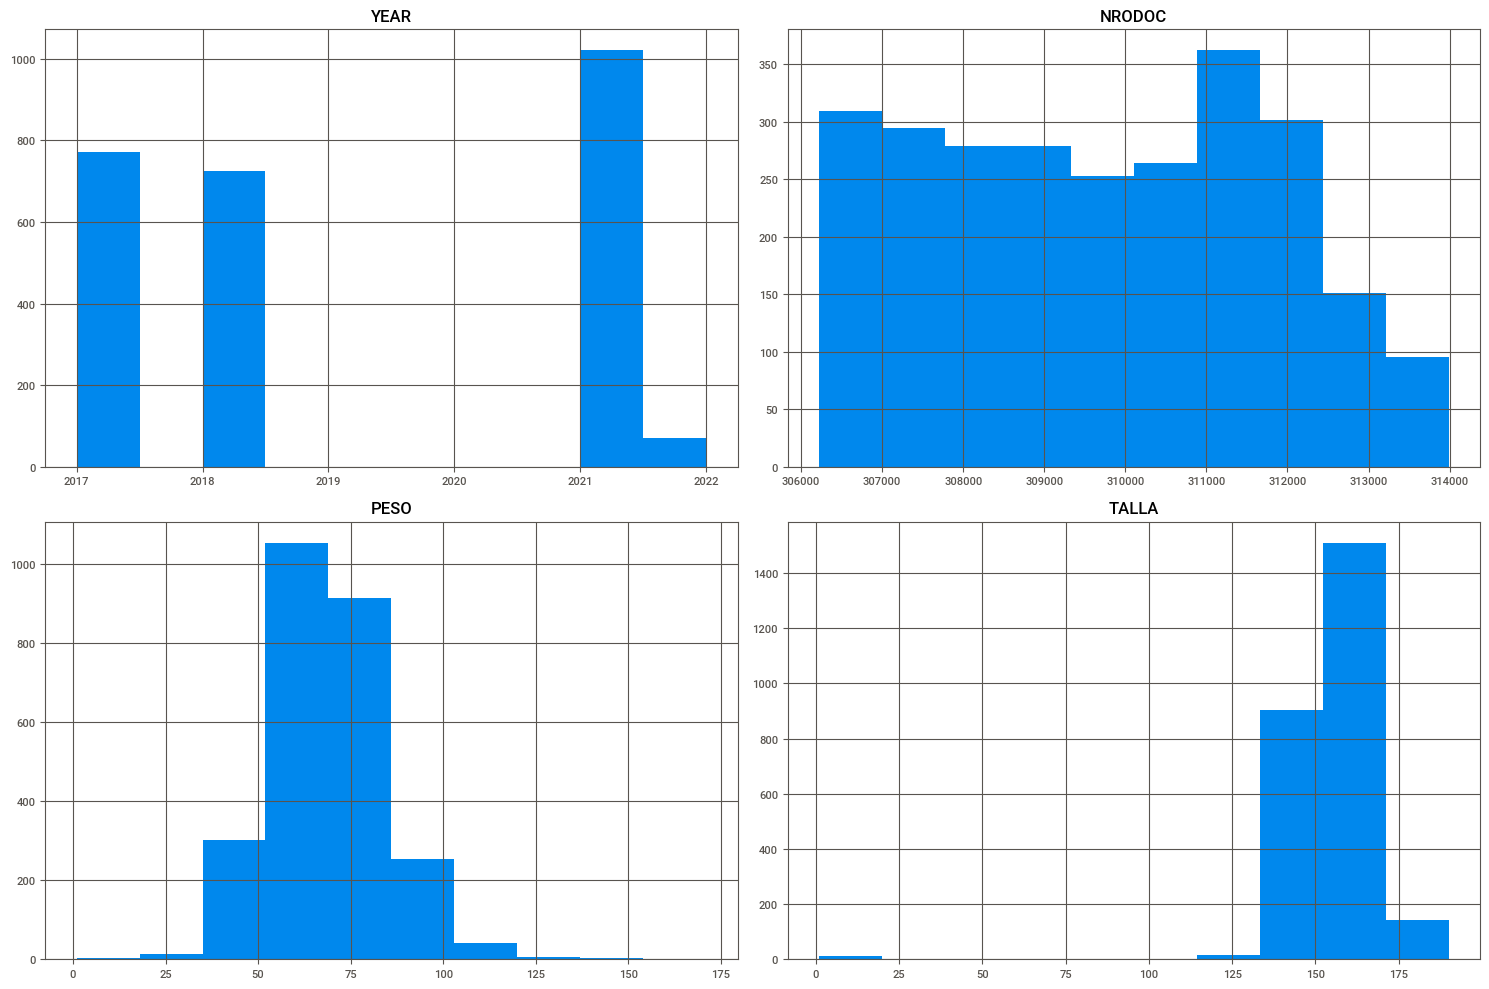

In [50]:
#Distribución de Variables Numéricas
df_cronicos60.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [51]:
#Distribución de Variables Categóricas: Conteo de valores únicos para variables categóricas
for column in df_cronicos60.select_dtypes(include=['object']).columns:
    print(df_cronicos60[column].value_counts())

MES
OCTUBRE       484
FEBRERO       377
ENERO         345
NOVIEMBRE     297
DICIEMBRE     260
MARZO         216
SEPTIEMBRE    181
AGOSTO        133
JULIO          97
MAYO           86
JUNIO          67
ABRIL          44
Name: count, dtype: int64
CLASIFICACION IMC
Sobrepeso         919
Obesidad Grasa    808
Normal            779
Bajo               81
Name: count, dtype: int64
DIAGNOSTICO PRINCIPAL
I10X - HIPERTENSION ESENCIAL (PRIMARIA)                                             928
SIN INFORMACION                                                                     404
J449 - ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA NO ESPECIFICADA                      197
E119 - DIABETES MELLITUS NO INSULINODEPENDIENTE SIN MENCION DE COMPLICACION         112
E108 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES NO ESPECIFICADAS    111
                                                                                   ... 
M068 - OTRAS ARTRITIS REUMATOIDES ESPECIFICADAS                         

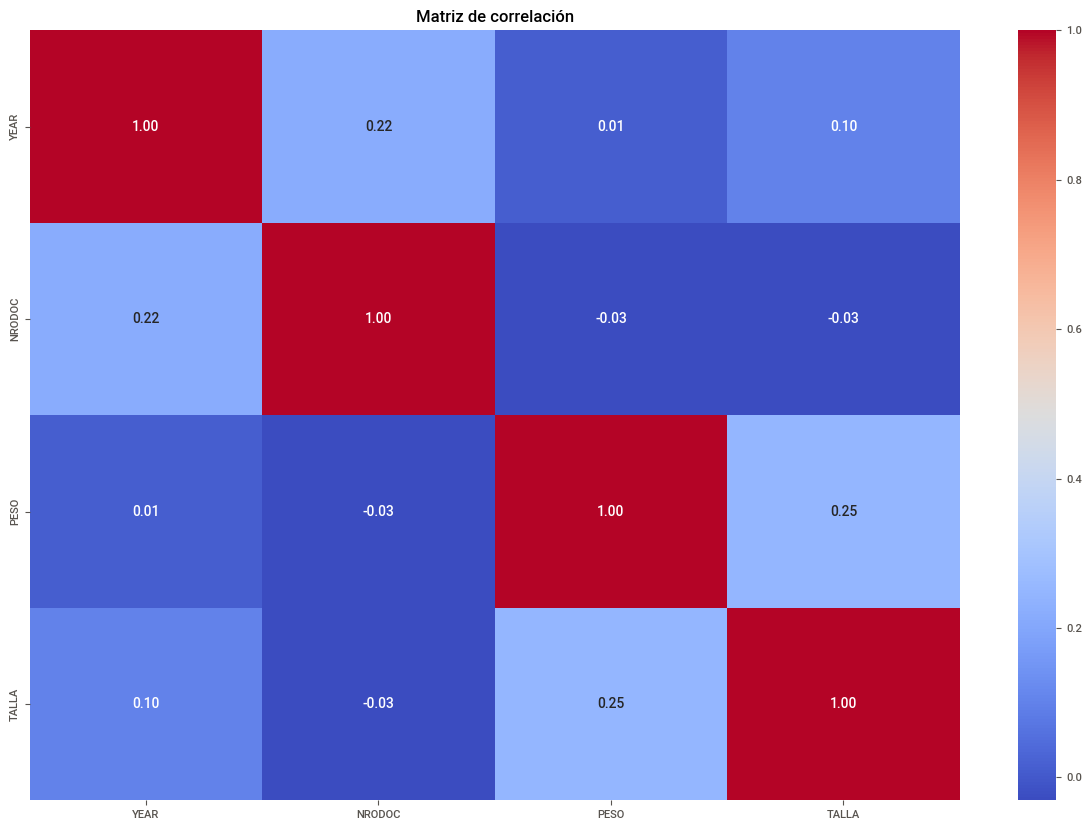

In [52]:
#Correlación entre Variables: Matriz de correlación para variables numéricas.
# Seleccionar solo las columnas numéricas
numeric_cols = df_cronicos60.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
corr_matrix = df_cronicos60[numeric_cols].corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


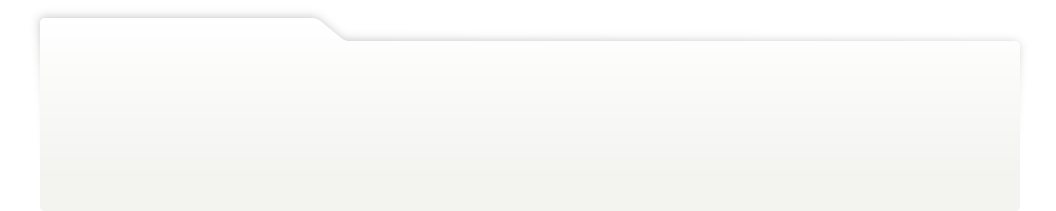
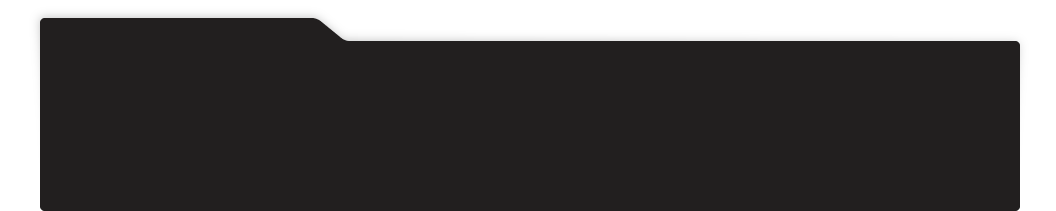
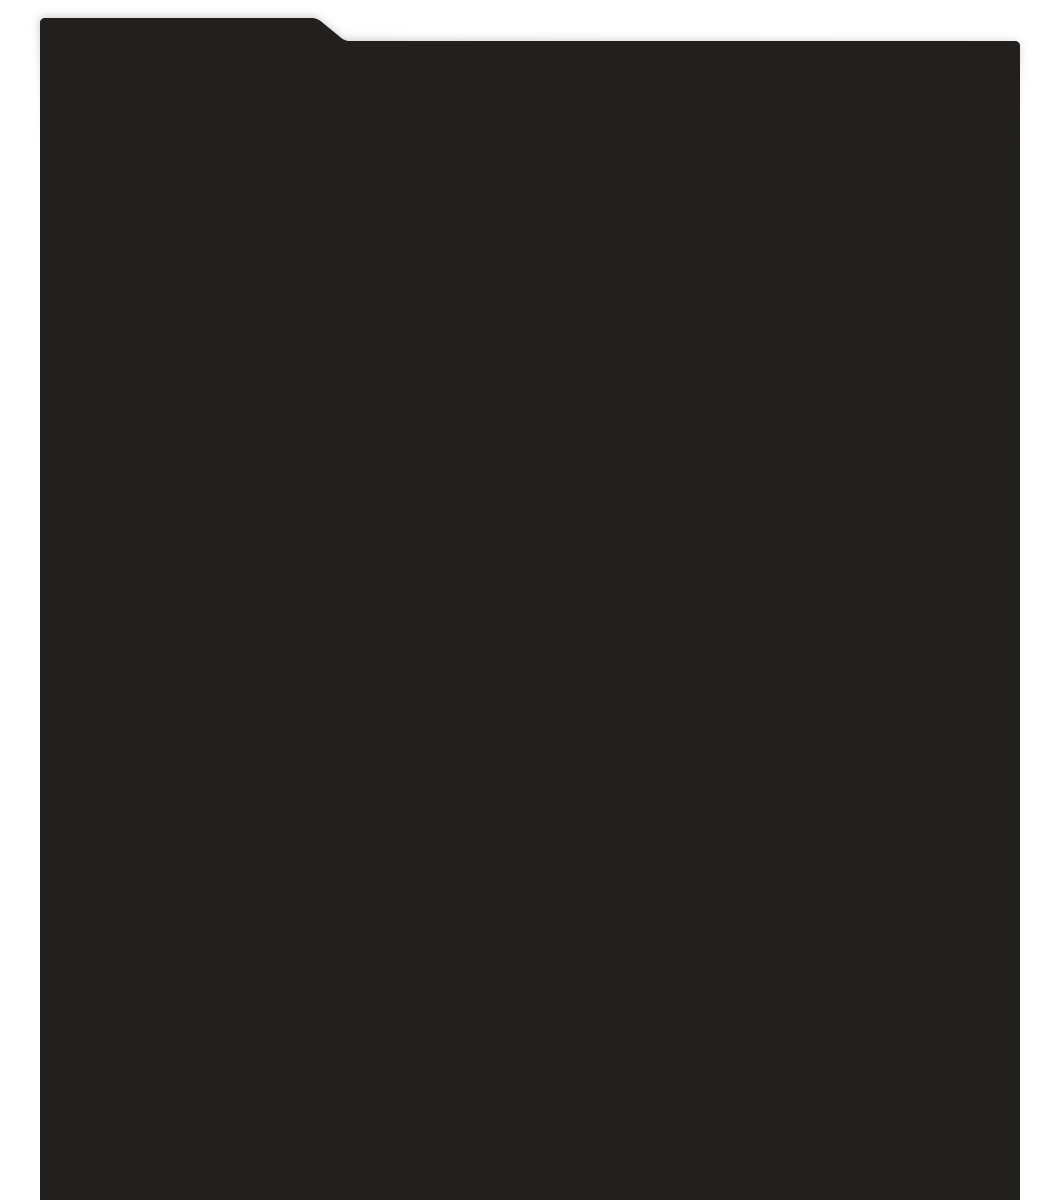
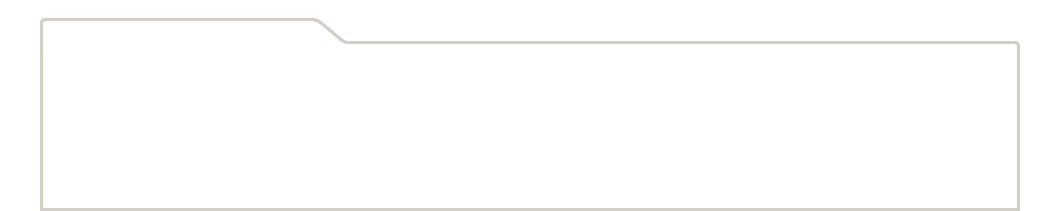
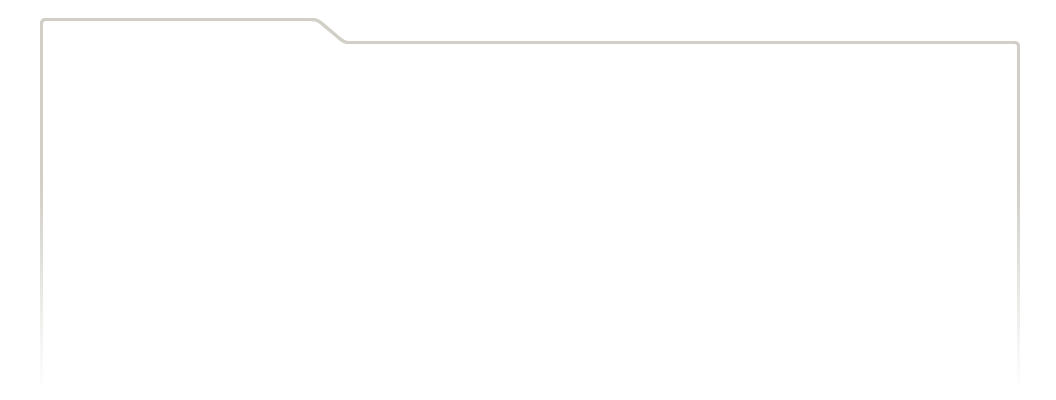
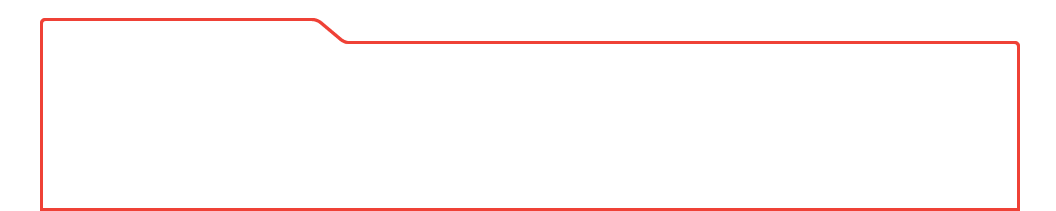
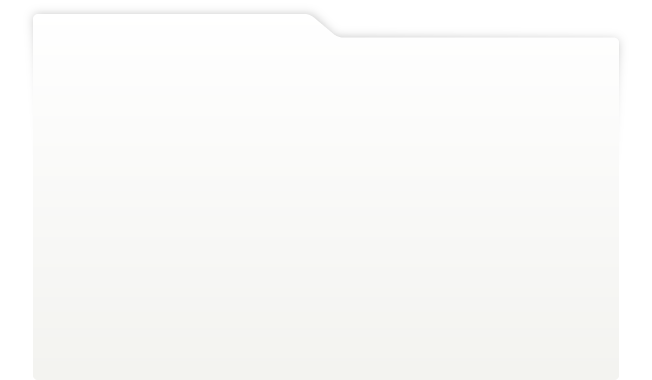
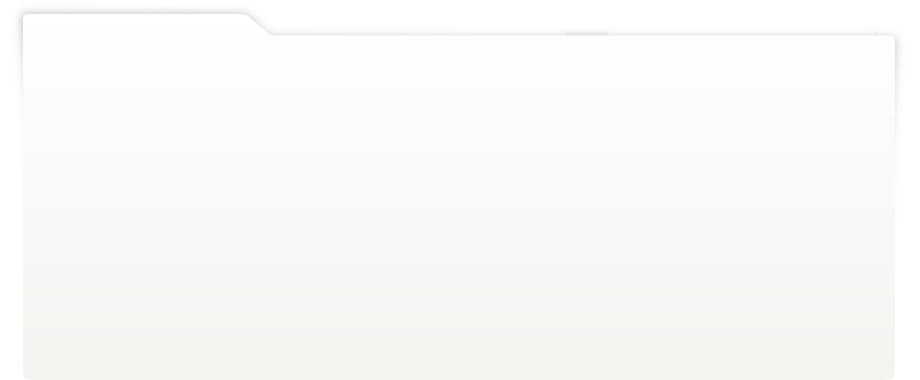
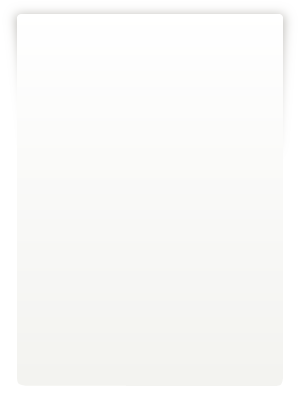
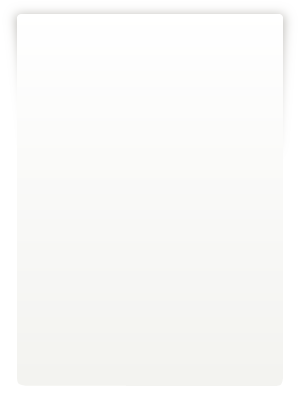
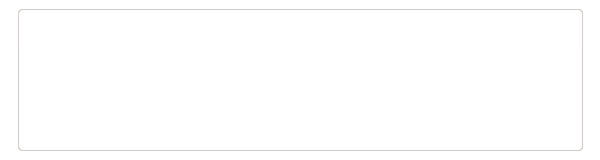
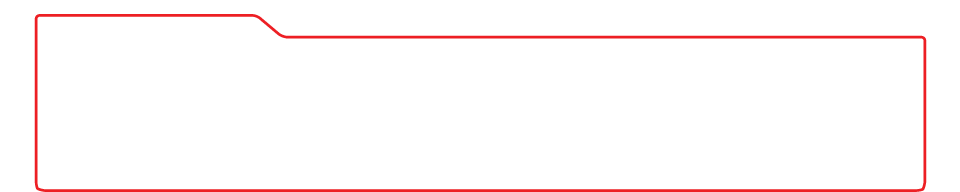
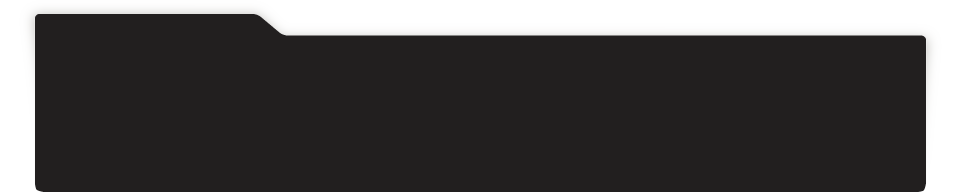
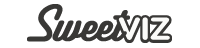
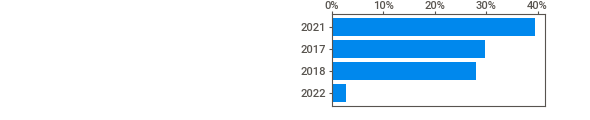
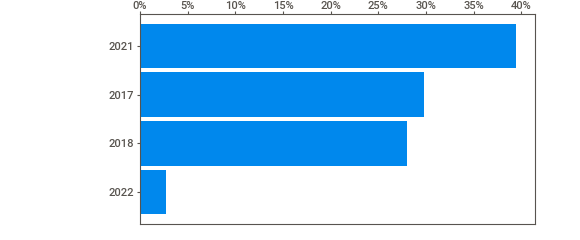
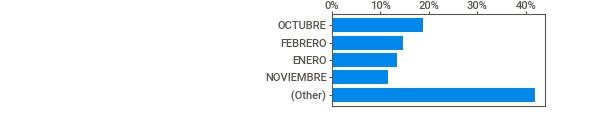
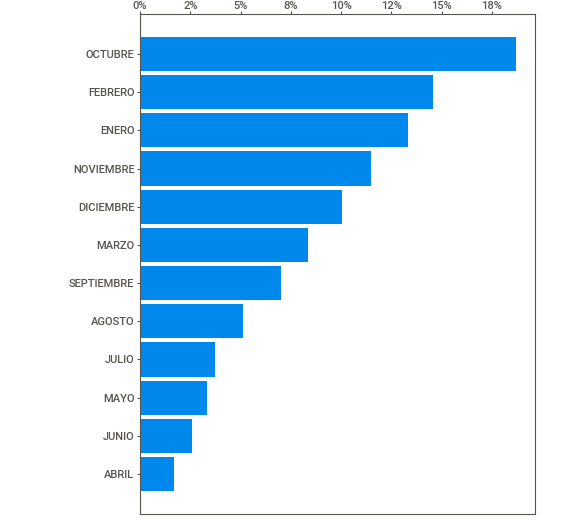
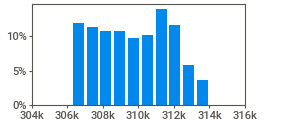
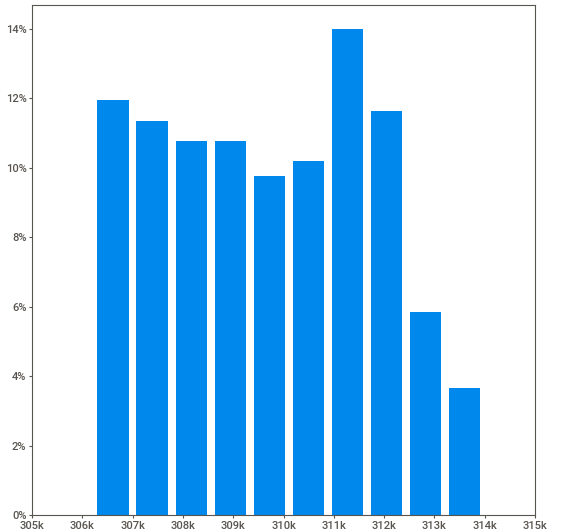
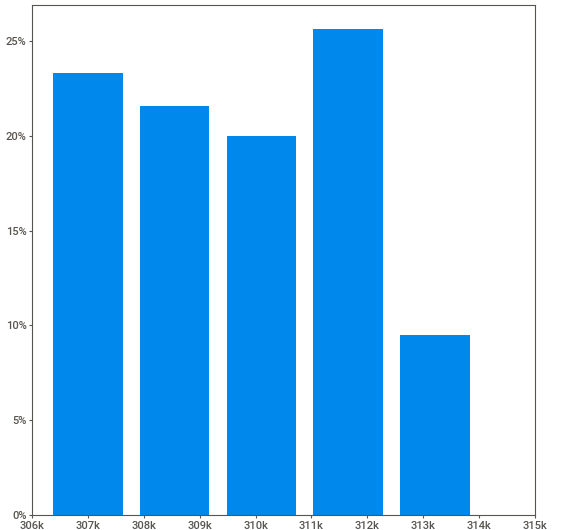
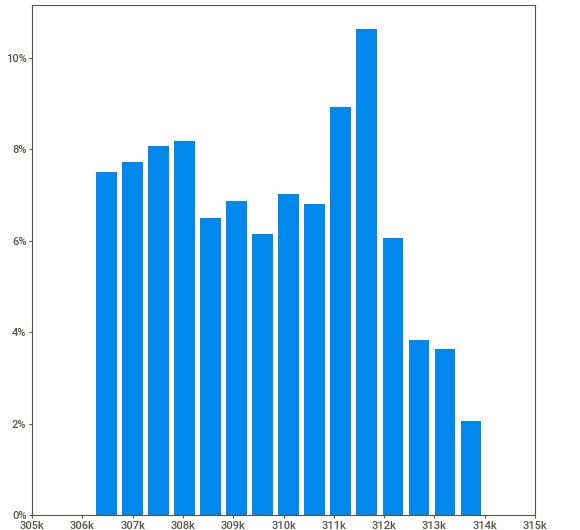
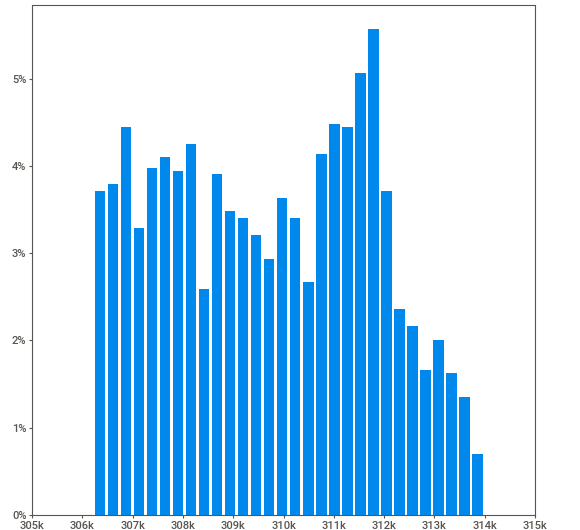
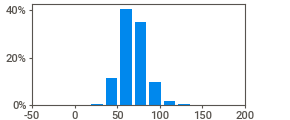
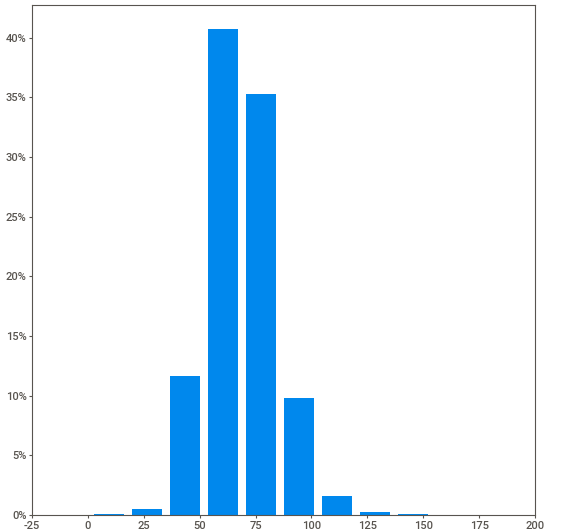
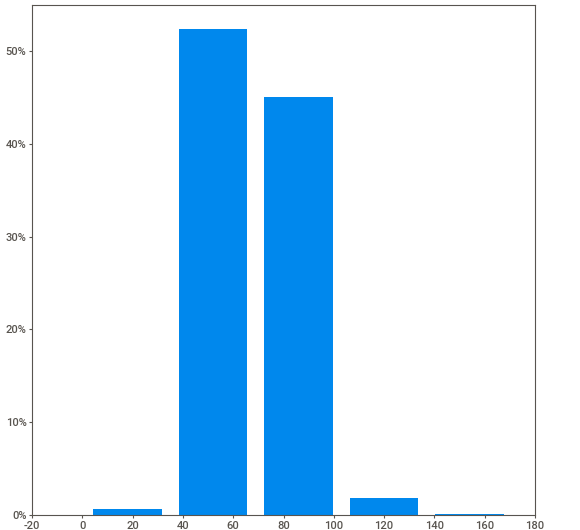
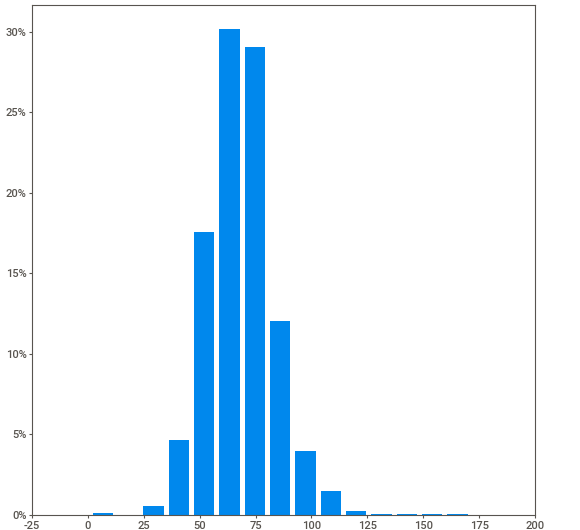
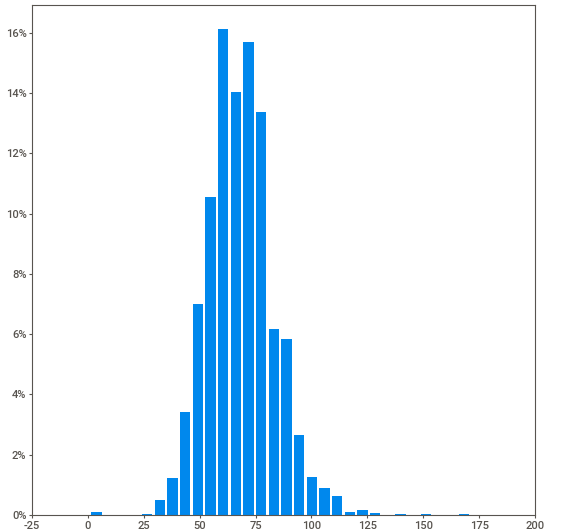
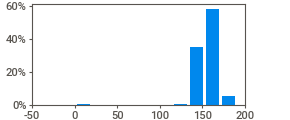
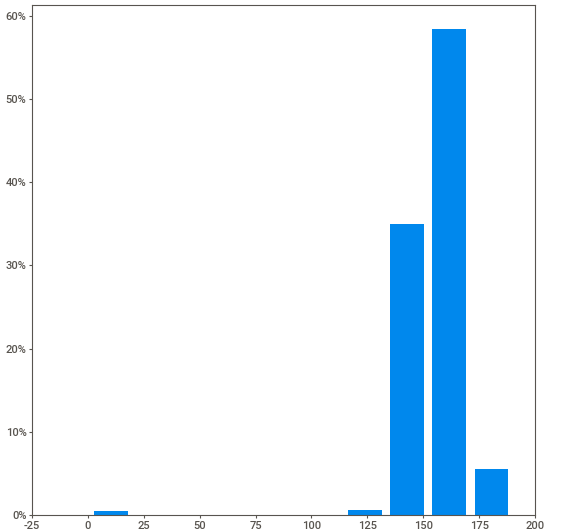
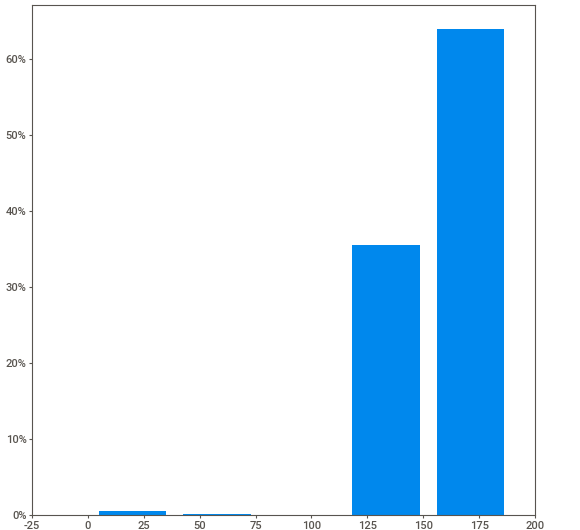
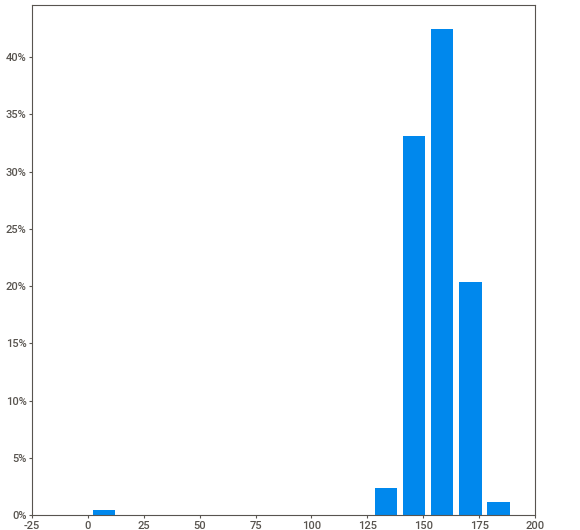
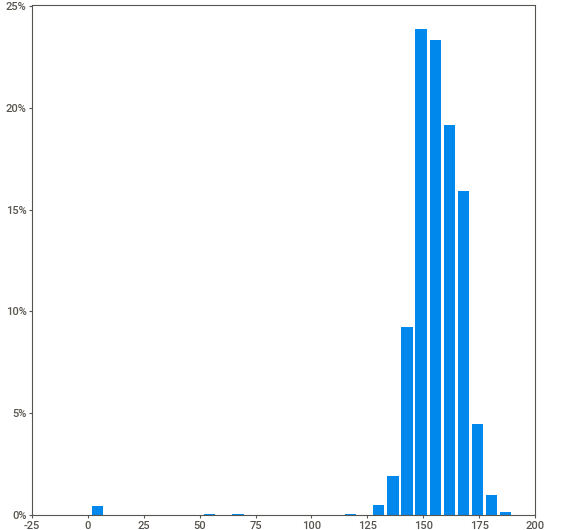
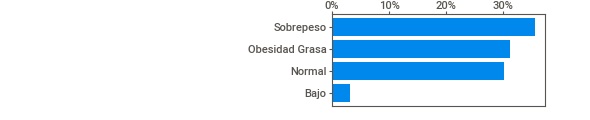
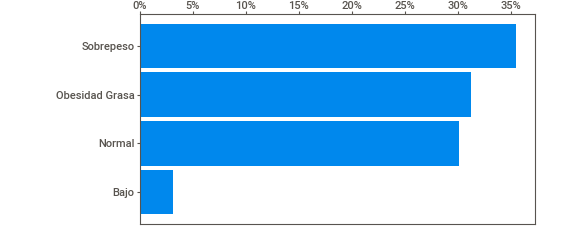
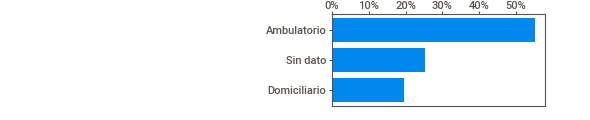
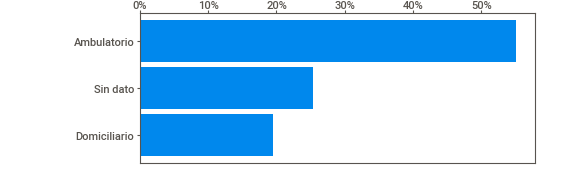
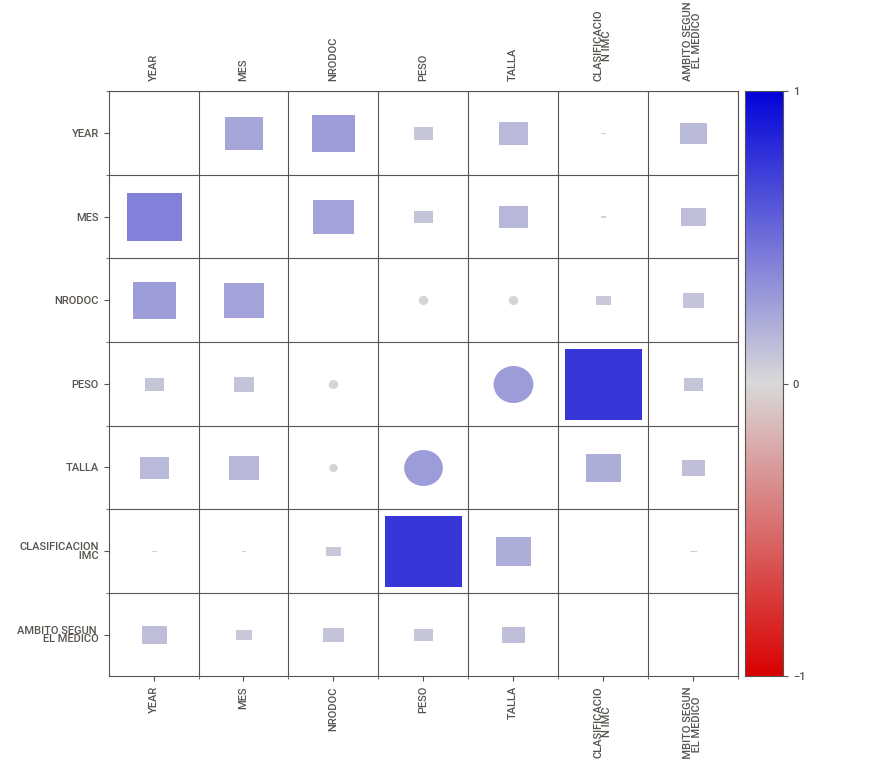
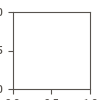

In [53]:
#ahora haremos una exploración rápida de las variables del df_cronicos60
rgd = sv.analyze(df_cronicos60)
rgd.show_notebook()

De la base crónicos podemos decir que el 39% de los datos son del año 2021, se tiene también datos del 2017, 2018 y 2022.
El mes con mayor registros ha sido octubre con el 19%.
El peso máximo de las personas es de 171 Kg  y el promedio es de 68 kilos.
En cuanto a la talla, el promedio es de 156 cm.
La clasificación por índice de masa corporal (IMC) es 36% sobrepeso, 31% obesidad grasa, 30% normal y 3% bajo.
El diagnóstico principal es HIPERTENSIÓN ESENCIAL (PRIMARIA) representada por el 36% de los datos, luego hay un 16% sin información y sigue ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA NO ESPECIFICADA con 8%.
El ámbito de atención ha sido ambulatorio en un  55%, domiciliario en un 19% y sin datos un 25%.

#Combinamos bases de datos

In [54]:
# Combinamos df_egresos60 con db_usuarios60 en base a NRODOC
df_merge = pd.merge(df_usuarios60, df_egresos60, on='NRODOC', how='inner')

# Combina df_merge con db_cronicos60 en base a NRODOC
df_final = pd.merge(df_merge, df_cronicos60, on='NRODOC', how='inner')

In [55]:
#Verificamos las columnas y las dimensiones de la base
print(df_final.columns)
print(df_final.shape)

Index(['NRODOC', 'SEXO', 'EDAD', 'YEAR_x', 'MES_x', 'QUINQUENIO', 'YEAR_y',
       'MES_y', 'REGIMEN AFILIACION', 'EPS VALIDADA', 'MODALIDAD CONTRATO',
       'VIA INGRESO', 'SERVICIO EGRESO', 'TIPO EGRESO',
       'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO', 'FECHA SALIDA',
       'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
       'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO',
       'TIPO DIAGNOSTICO PRINCIPAL', 'PROFESIONAL ESPECIALIDAD',
       'TIEMPO ESTANCIA (DIAS)', 'YEAR', 'MES', 'PESO', 'TALLA',
       'CLASIFICACION IMC', 'DIAGNOSTICO PRINCIPAL', 'AMBITO SEGUN EL MEDICO'],
      dtype='object')
(1596, 32)


In [62]:
# Ahora vamos a verificar nuevamente la cantidad de diagnósticos asociados a cada número de documento y la cantidad de diagnósticos únicos,
#ya que si bien un usuario puede tener varios diagnósticos principales, no debería tener el mismo diagnóstico más de una vez.

# Agrupar por NRODOC y realizar las agregaciones necesarias
aggregations2 = {
    'DIAGNOSTICO PRINCIPAL': ['count', 'nunique']
}

diagnosticos_nrodoc = df_final.groupby('NRODOC').agg(aggregations2).reset_index()

# Renombrar las columnas
diagnosticos_nrodoc.columns = ['NRODOC', 'Cantidad_Total_Diagnosticos', 'Cantidad_Diagnosticos_Unicos']

# Mostrar el resultado
print(diagnosticos_nrodoc)

     NRODOC  Cantidad_Total_Diagnosticos  Cantidad_Diagnosticos_Unicos
0    306230                            3                             3
1    306248                            8                             2
2    306258                            1                             1
3    306259                            2                             2
4    306267                            1                             1
..      ...                          ...                           ...
883  313921                            1                             1
884  313948                            1                             1
885  313965                            1                             1
886  313973                            1                             1
887  313987                            1                             1

[888 rows x 3 columns]


In [66]:
#Vamos a eliminar los registros de los usuarios cuyo diagnóstico está repetido, dejando para cada usuario los diagnósticos asignados diferentes entre sí.
# Eliminar registros duplicados basados en NRODOC y DIAGNOSTICO PRINCIPAL
df_final= df_final.drop_duplicates(subset=['NRODOC', 'DIAGNOSTICO PRINCIPAL'])

# Verificar el nuevo conjunto de datos
print(df_final.shape)

(1259, 32)


#Exploración de datos con base final

Realizamos una exploración de los datos con la base final para comparar algunas variables con la variable objetivo (estancia)

## Exportamos bases preprocesadas

In [67]:
df_usuarios60.to_csv('df_usuarios60.csv', index=False)
df_egresos60.to_csv('df_egresos60.csv', index=False)
df_cronicos60.to_csv('df_cronicos60.csv', index=False)
df_final.to_csv('df_final.csv', index=False)

In [59]:
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>